In [1]:
%matplotlib inline
import matplotlib as mpl
mpl.rc("font", family="Arial")
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from pylab import *

import numpy as np
import pyemma
import pytraj as pt
import mdtraj as md

import pickle
import seaborn as sns

from pyemma.util.contexts import settings
from glob import glob

## Loading data

In [2]:
rf0=pt.load('../1-Trajectories/0-Parm_rst/closed6_dry_rot0.rst7', 
            '../1-Trajectories/0-Parm_rst/closed6_dry_rot0.parm7')

rf1=pt.load('../1-Trajectories/0-Parm_rst/closed6_dry_rot1.rst7', 
            '../1-Trajectories/0-Parm_rst/closed6_dry_rot1.parm7')

rf2=pt.load('../1-Trajectories/0-Parm_rst//closed6_dry_rot2.rst7',
            '../1-Trajectories/0-Parm_rst/closed6_dry_rot2.parm7')

rf3=pt.load('../1-Trajectories/0-Parm_rst/closed6_dry_rot3.rst7', 
            '../1-Trajectories/0-Parm_rst/closed6_dry_rot3.parm7')

rf4=pt.load('../1-Trajectories/0-Parm_rst/closed6_dry_rot4.rst7',
            '../1-Trajectories/0-Parm_rst/closed6_dry_rot4.parm7')

rf5=pt.load('../1-Trajectories/0-Parm_rst/closed6_dry_rot5.rst7', 
            '../1-Trajectories/0-Parm_rst/closed6_dry_rot5.parm7')

rfopen=pt.load('../1-Trajectories/0-Parm_rst/open10_dry.rst7',
               '../1-Trajectories/0-Parm_rst/open10_dry.parm7')

In [3]:
indir1 = '../1-Trajectories/1-NoEq_without_IPA'
indir2 = '../1-Trajectories/3-Adaptive_sampling_without_IPA'
topfile = '../1-Trajectories/0-Parm_rst/open10_dry.parm7'

traj_list1 = sorted(glob(indir1+'/*.nc'))
traj_list2 = sorted(glob(indir2+'/*.nc'))

traj_list=traj_list1 # +traj_list2
traj_list

['../1-Trajectories/1-NoEq_without_IPA/closed_dry_01.nc',
 '../1-Trajectories/1-NoEq_without_IPA/closed_dry_02.nc',
 '../1-Trajectories/1-NoEq_without_IPA/closed_dry_03.nc',
 '../1-Trajectories/1-NoEq_without_IPA/closed_dry_04.nc',
 '../1-Trajectories/1-NoEq_without_IPA/closed_dry_05.nc',
 '../1-Trajectories/1-NoEq_without_IPA/closed_dry_06.nc',
 '../1-Trajectories/1-NoEq_without_IPA/closed_dry_07.nc',
 '../1-Trajectories/1-NoEq_without_IPA/closed_dry_08.nc',
 '../1-Trajectories/1-NoEq_without_IPA/closed_dry_09.nc',
 '../1-Trajectories/1-NoEq_without_IPA/closed_dry_10.nc',
 '../1-Trajectories/1-NoEq_without_IPA/open_dry_01.nc',
 '../1-Trajectories/1-NoEq_without_IPA/open_dry_02.nc',
 '../1-Trajectories/1-NoEq_without_IPA/open_dry_03.nc',
 '../1-Trajectories/1-NoEq_without_IPA/open_dry_04.nc',
 '../1-Trajectories/1-NoEq_without_IPA/open_dry_05.nc',
 '../1-Trajectories/1-NoEq_without_IPA/open_dry_06.nc',
 '../1-Trajectories/1-NoEq_without_IPA/open_dry_07.nc',
 '../1-Trajectories/1-NoEq_w

## RMSD 'features'

In [4]:
with open('./pickled/2-Without_IPA/1_Y.pickle', 'rb') as inf:
    Y = pickle.load(inf)

In [5]:
Y_concat= np.concatenate(Y)

In [6]:
tot=0
for i in range(0,len(Y)):
    print(len(Y[i])/10000, "microseconds")
    tot+=len(Y[i])
print("simulated time:", tot/10000, "microseconds")

2.434 microseconds
2.4446 microseconds
2.5 microseconds
2.5 microseconds
2.5 microseconds
2.5 microseconds
3.5 microseconds
3.5 microseconds
3.5 microseconds
3.5 microseconds
2.5 microseconds
2.371 microseconds
2.5 microseconds
2.5 microseconds
2.4372 microseconds
2.5 microseconds
2.5 microseconds
3.5 microseconds
2.5 microseconds
2.5 microseconds
simulated time: 54.6868 microseconds


## Clustering

### Effect clustering on VAMP-2 score

In [7]:
n_clustercenters = [10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000,1200, 1400, 1600, 1800, 2000]

In [12]:
scores = np.zeros((len(n_clustercenters), 5))
for n, k in enumerate(n_clustercenters):
    for m in range(5):
        with pyemma.util.contexts.settings(show_progress_bars=True):
            _cl = pyemma.coordinates.cluster_kmeans(
                Y, k=k, max_iter=500, stride=50)
            _msm = pyemma.msm.estimate_markov_model(_cl.dtrajs, 5)
            scores[n, m] = _msm.score_cv(
                _cl.dtrajs, n=1, score_method='VAMP2', score_k=min(10, k))

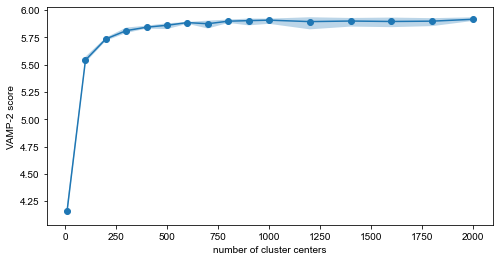

In [13]:
fig, ax = plt.subplots(figsize=(8, 4))
lower, upper = pyemma.util.statistics.confidence_interval(scores.T.tolist(), conf=0.9)
ax.fill_between(n_clustercenters, lower, upper, alpha=0.3)
ax.plot(n_clustercenters, np.mean(scores, axis=1), '-o')
# ax.semilogx()
ax.set_xlabel('number of cluster centers')
ax.set_ylabel('VAMP-2 score')
fig.savefig('./plots/2-Without_IPA/4_optimum_cluster_number.png', dpi=600)

In [ ]:
fig, ax = plt.subplots()
lower, upper = pyemma.util.statistics.confidence_interval(scores.T.tolist(), conf=0.9)
ax.fill_between(n_clustercenters, lower, upper, alpha=0.3)
ax.plot(n_clustercenters, np.mean(scores, axis=1), '-o')
# ax.semilogx()
ax.set_xlabel('number of cluster centers')
ax.set_ylabel('VAMP-2 score')
ax.set_xlim(300, 1600)
ax.set_ylim(5.75, 5.95)
fig.tight_layout()

### Different cluster sizes

In [8]:
cluster_1000 = pyemma.coordinates.cluster_kmeans(
    Y, k=1000, max_iter=500, stride=10)

with open('./pickled/2-Without_IPA/1_cluster_1000.pickle', 'wb') as outf:
    pickle.dump(cluster_1000, outf)

dtrajs_concatenated_1000 = np.concatenate(cluster_1000.dtrajs)

In [15]:
cluster_1500 = pyemma.coordinates.cluster_kmeans(
    Y, k=1500, max_iter=500, stride=10)

with open('./pickled/2-Without_IPA/1_cluster_1500.pickle', 'wb') as outf:
    pickle.dump(cluster_1500, outf)

dtrajs_concatenated_1500 = np.concatenate(cluster_1500.dtrajs)

In [7]:
cluster_500 = pyemma.coordinates.cluster_kmeans(
    Y, k=500, max_iter=500, stride=10)

with open('./pickled/2-Without_IPA/1_cluster_500.pickle', 'wb') as outf:
    pickle.dump(cluster_500, outf)

dtrajs_concatenated_500 = np.concatenate(cluster_500.dtrajs)

In [8]:
cluster_250 = pyemma.coordinates.cluster_kmeans(
    Y, k=250, max_iter=250, stride=10)

with open('./pickled/2-Without_IPA/1_cluster_250.pickle', 'wb') as outf:
    pickle.dump(cluster_250, outf)

dtrajs_concatenated_250 = np.concatenate(cluster_250.dtrajs)

In [31]:
with open('./pickled/2-Without_IPA/1_cluster_250.pickle', 'rb') as inf:
    cluster_250 = pickle.load(inf)
with open('./pickled/2-Without_IPA/1_cluster_250_dtrajs.pickle', 'rb') as inf:
    cluster_250_dtrajs = pickle.load(inf)

# dtrajs_concatenated_250 = np.concatenate(cluster_250.dtrajs)

    
with open('./pickled/2-Without_IPA/1_cluster_500.pickle', 'rb') as inf:
    cluster_500 = pickle.load(inf)
with open('./pickled/2-Without_IPA/1_cluster_500_dtrajs.pickle', 'rb') as inf:
    cluster_500_dtrajs = pickle.load(inf)

# dtrajs_concatenated_500 = np.concatenate(cluster_500.dtrajs)


with open('./pickled/2-Without_IPA/1_cluster_1000.pickle', 'rb') as inf:
    cluster_1000 = pickle.load(inf)
with open('./pickled/2-Without_IPA/1_cluster_1000_dtrajs.pickle', 'rb') as inf:
    cluster_1000_dtrajs = pickle.load(inf)

# dtrajs_concatenated_1000 = np.concatenate(cluster_1000.dtrajs)

### ITS for each cluster size

In [8]:
mylags = [1,2,5,10,25,50,100,200,300,400,500,600,700,800,900,1000,
          1250,1500,1750,2000,2250,2500,2750,3000,3250,3500,3750,4000,4500,5000,
          5500,6000,6500,7000,7500,8000,8500,9000,9500,10000]

In [23]:
its_1000 = pyemma.msm.its(cluster_1000.dtrajs, lags=mylags, nits=10, errors='bayes')
with open('./pickled/2-Without_IPA/1_its_1000.pickle', 'wb') as outf:
    pickle.dump(its_1000, outf)

In [15]:
its_1500 = pyemma.msm.its(cluster_1500.dtrajs, lags=mylags, nits=10, errors='bayes')
with open('./pickled/2-Without_IPA/1_its_1500.pickle', 'wb') as outf:
    pickle.dump(its_1500, outf)

In [22]:
its_500 = pyemma.msm.its(cluster_500.dtrajs, lags=mylags, nits=10, errors='bayes')
with open('./pickled/2-Without_IPA/1_its_500.pickle', 'wb') as outf:
    pickle.dump(its_500, outf)

In [21]:
its_250 = pyemma.msm.its(cluster_250.dtrajs, lags=mylags, nits=10, errors='bayes')
with open('./pickled/2-Without_IPA/1_its_250.pickle', 'wb') as outf:
    pickle.dump(its_250, outf)

In [9]:
with open('./pickled/2-Without_IPA/1_its_250.pickle', 'rb') as inf:
    its_250 = pickle.load(inf)
with open('./pickled/2-Without_IPA/1_its_500.pickle', 'rb') as inf:
    its_500 = pickle.load(inf)
with open('./pickled/2-Without_IPA/1_its_1000.pickle', 'rb') as inf:
    its_1000 = pickle.load(inf)
with open('./pickled/2-Without_IPA/1_its_1500.pickle', 'rb') as inf:
    its_1500 = pickle.load(inf)

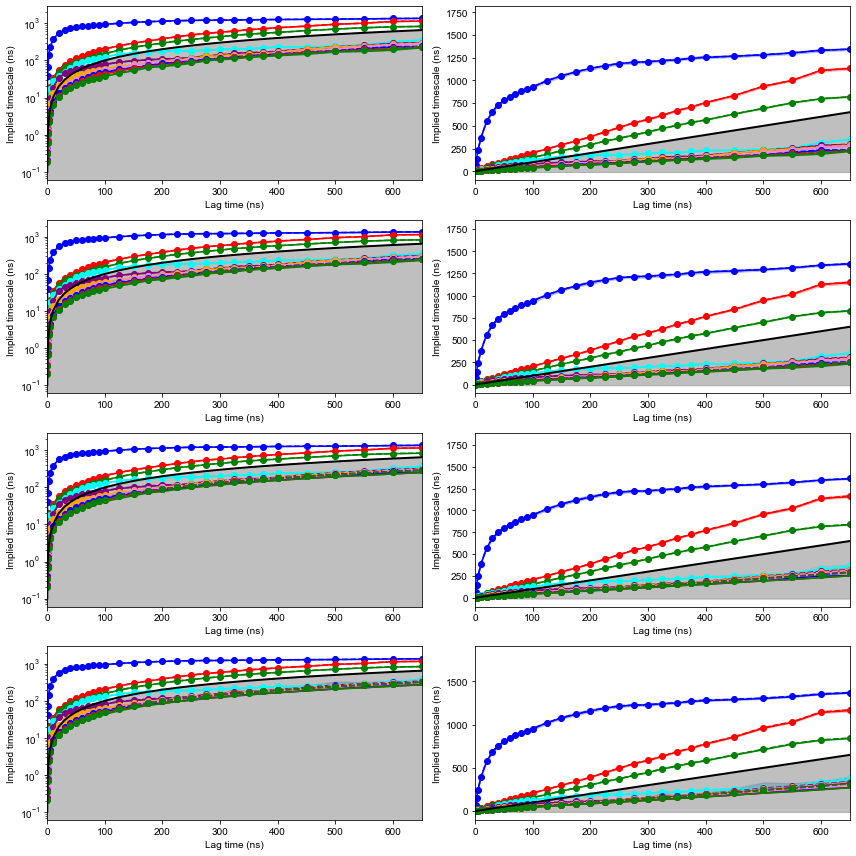

In [27]:
fig, axes = plt.subplots(4, 2, figsize=(12, 12), sharex=False, sharey=False)

pyemma.plots.plot_implied_timescales(its_250,ax=axes[0][0],units='ns', dt=0.1, ylog=True);
pyemma.plots.plot_implied_timescales(its_500,ax=axes[1][0],units='ns', dt=0.1, ylog=True);
pyemma.plots.plot_implied_timescales(its_1000,ax=axes[2][0],units='ns', dt=0.1, ylog=True);
pyemma.plots.plot_implied_timescales(its_1500,ax=axes[3][0],units='ns', dt=0.1, ylog=True);

pyemma.plots.plot_implied_timescales(its_250,ax=axes[0][1],units='ns', dt=0.1, ylog=False);
pyemma.plots.plot_implied_timescales(its_500,ax=axes[1][1],units='ns', dt=0.1, ylog=False);
pyemma.plots.plot_implied_timescales(its_1000,ax=axes[2][1],units='ns', dt=0.1, ylog=False);
pyemma.plots.plot_implied_timescales(its_1500,ax=axes[3][1],units='ns', dt=0.1, ylog=False);


axes[0][0].set_xlabel("Lag time (ns)")
axes[1][0].set_xlabel("Lag time (ns)")
axes[2][0].set_xlabel("Lag time (ns)")
axes[3][0].set_xlabel("Lag time (ns)")

axes[0][1].set_xlabel("Lag time (ns)")
axes[1][1].set_xlabel("Lag time (ns)")
axes[2][1].set_xlabel("Lag time (ns)")
axes[3][1].set_xlabel("Lag time (ns)")

axes[0][0].set_ylabel("Implied timescale (ns)")
axes[1][0].set_ylabel("Implied timescale (ns)")
axes[2][0].set_ylabel("Implied timescale (ns)")
axes[3][0].set_ylabel("Implied timescale (ns)")

axes[0][1].set_ylabel("Implied timescale (ns)")
axes[1][1].set_ylabel("Implied timescale (ns)")
axes[2][1].set_ylabel("Implied timescale (ns)")
axes[3][1].set_ylabel("Implied timescale (ns)")

axes[0][0].set_xlim(0,650)
axes[1][0].set_xlim(0,650)
axes[2][0].set_xlim(0,650)
axes[3][0].set_xlim(0,650)

axes[0][1].set_xlim(0,650)
axes[1][1].set_xlim(0,650)
axes[2][1].set_xlim(0,650)
axes[3][1].set_xlim(0,650)

plt.tight_layout()

fig.savefig('./plots/2-Without_IPA/6_lagtime_effect_cluster_size_1.png', dpi=600)

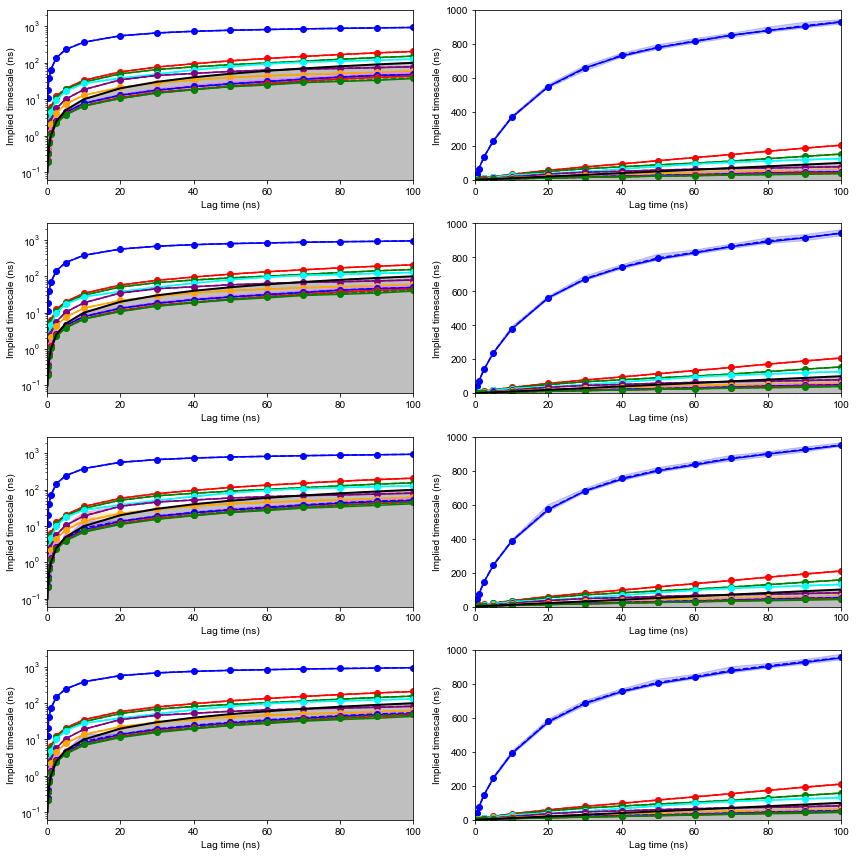

In [28]:
fig, axes = plt.subplots(4, 2, figsize=(12, 12), sharex=False, sharey=False)

pyemma.plots.plot_implied_timescales(its_250,ax=axes[0][0],units='ns', dt=0.1, ylog=True);
pyemma.plots.plot_implied_timescales(its_500,ax=axes[1][0],units='ns', dt=0.1, ylog=True);
pyemma.plots.plot_implied_timescales(its_1000,ax=axes[2][0],units='ns', dt=0.1, ylog=True);
pyemma.plots.plot_implied_timescales(its_1500,ax=axes[3][0],units='ns', dt=0.1, ylog=True);

pyemma.plots.plot_implied_timescales(its_250,ax=axes[0][1],units='ns', dt=0.1, ylog=False);
pyemma.plots.plot_implied_timescales(its_500,ax=axes[1][1],units='ns', dt=0.1, ylog=False);
pyemma.plots.plot_implied_timescales(its_1000,ax=axes[2][1],units='ns', dt=0.1, ylog=False);
pyemma.plots.plot_implied_timescales(its_1500,ax=axes[3][1],units='ns', dt=0.1, ylog=False);


axes[0][0].set_xlabel("Lag time (ns)")
axes[1][0].set_xlabel("Lag time (ns)")
axes[2][0].set_xlabel("Lag time (ns)")
axes[3][0].set_xlabel("Lag time (ns)")

axes[0][1].set_xlabel("Lag time (ns)")
axes[1][1].set_xlabel("Lag time (ns)")
axes[2][1].set_xlabel("Lag time (ns)")
axes[3][1].set_xlabel("Lag time (ns)")

axes[0][0].set_ylabel("Implied timescale (ns)")
axes[1][0].set_ylabel("Implied timescale (ns)")
axes[2][0].set_ylabel("Implied timescale (ns)")
axes[3][0].set_ylabel("Implied timescale (ns)")

axes[0][1].set_ylabel("Implied timescale (ns)")
axes[1][1].set_ylabel("Implied timescale (ns)")
axes[2][1].set_ylabel("Implied timescale (ns)")
axes[3][1].set_ylabel("Implied timescale (ns)")

axes[0][0].set_xlim(0,100)
axes[1][0].set_xlim(0,100)
axes[2][0].set_xlim(0,100)
axes[3][0].set_xlim(0,100)

axes[0][1].set_xlim(0,100)
axes[1][1].set_xlim(0,100)
axes[2][1].set_xlim(0,100)
axes[3][1].set_xlim(0,100)

axes[0][1].set_ylim(0,1000)
axes[1][1].set_ylim(0,1000)
axes[2][1].set_ylim(0,1000)
axes[3][1].set_ylim(0,1000)

plt.tight_layout()

fig.savefig('./plots/2-Without_IPA/6_lagtime_effect_cluster_size_2.png', dpi=600)

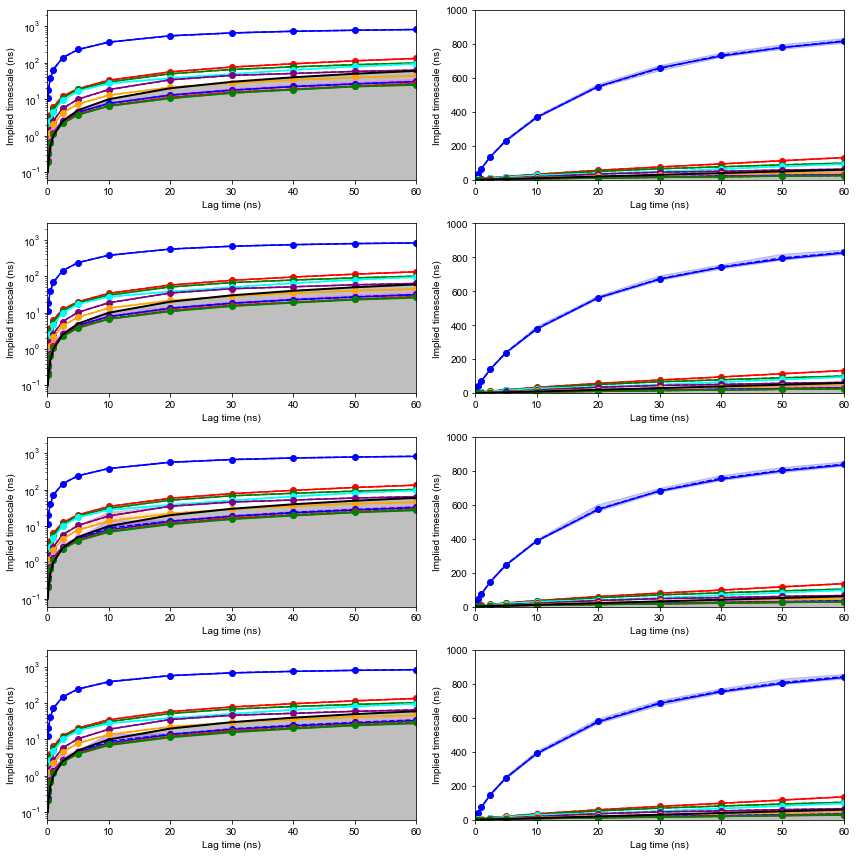

In [29]:
fig, axes = plt.subplots(4, 2, figsize=(12, 12), sharex=False, sharey=False)

pyemma.plots.plot_implied_timescales(its_250,ax=axes[0][0],units='ns', dt=0.1, ylog=True);
pyemma.plots.plot_implied_timescales(its_500,ax=axes[1][0],units='ns', dt=0.1, ylog=True);
pyemma.plots.plot_implied_timescales(its_1000,ax=axes[2][0],units='ns', dt=0.1, ylog=True);
pyemma.plots.plot_implied_timescales(its_1500,ax=axes[3][0],units='ns', dt=0.1, ylog=True);

pyemma.plots.plot_implied_timescales(its_250,ax=axes[0][1],units='ns', dt=0.1, ylog=False);
pyemma.plots.plot_implied_timescales(its_500,ax=axes[1][1],units='ns', dt=0.1, ylog=False);
pyemma.plots.plot_implied_timescales(its_1000,ax=axes[2][1],units='ns', dt=0.1, ylog=False);
pyemma.plots.plot_implied_timescales(its_1500,ax=axes[3][1],units='ns', dt=0.1, ylog=False);


axes[0][0].set_xlabel("Lag time (ns)")
axes[1][0].set_xlabel("Lag time (ns)")
axes[2][0].set_xlabel("Lag time (ns)")
axes[3][0].set_xlabel("Lag time (ns)")

axes[0][1].set_xlabel("Lag time (ns)")
axes[1][1].set_xlabel("Lag time (ns)")
axes[2][1].set_xlabel("Lag time (ns)")
axes[3][1].set_xlabel("Lag time (ns)")

axes[0][0].set_ylabel("Implied timescale (ns)")
axes[1][0].set_ylabel("Implied timescale (ns)")
axes[2][0].set_ylabel("Implied timescale (ns)")
axes[3][0].set_ylabel("Implied timescale (ns)")

axes[0][1].set_ylabel("Implied timescale (ns)")
axes[1][1].set_ylabel("Implied timescale (ns)")
axes[2][1].set_ylabel("Implied timescale (ns)")
axes[3][1].set_ylabel("Implied timescale (ns)")

axes[0][0].set_xlim(0,60)
axes[1][0].set_xlim(0,60)
axes[2][0].set_xlim(0,60)
axes[3][0].set_xlim(0,60)

axes[0][1].set_xlim(0,60)
axes[1][1].set_xlim(0,60)
axes[2][1].set_xlim(0,60)
axes[3][1].set_xlim(0,60)

axes[0][1].set_ylim(0,1000)
axes[1][1].set_ylim(0,1000)
axes[2][1].set_ylim(0,1000)
axes[3][1].set_ylim(0,1000)

plt.tight_layout()

fig.savefig('./plots/2-Without_IPA/6_lagtime_effect_cluster_size_3.png', dpi=600)

## MSM construction

### Effect cluster size on MSM

#### MSM calculations

In [17]:
msm_500_300 = pyemma.msm.bayesian_markov_model(cluster_500.dtrajs, lag=300, dt_traj='0.1 ns')
with open('./pickled/2-Without_IPA/1_msm_500_300.pickle', 'wb') as outf:
    pickle.dump(msm_500_300, outf)

In [13]:
msm_250_300 = pyemma.msm.bayesian_markov_model(cluster_250.dtrajs, lag=300, dt_traj='0.1 ns')
with open('./pickled/2-Without_IPA/1_msm_250_300.pickle', 'wb') as outf:
    pickle.dump(msm_250_300, outf)

In [14]:
msm_1000_300 = pyemma.msm.bayesian_markov_model(cluster_1000.dtrajs, lag=300, dt_traj='0.1 ns')
with open('./pickled/2-Without_IPA/1_msm_1000_300.pickle', 'wb') as outf:
    pickle.dump(msm_1000_300, outf)

In [16]:
msm_1500_300 = pyemma.msm.bayesian_markov_model(cluster_1500.dtrajs, lag=300, dt_traj='0.1 ns')
with open('./pickled/2-Without_IPA/1_msm_1500_300.pickle', 'wb') as outf:
    pickle.dump(msm_1500_300, outf)

In [48]:
msm_250_6000 = pyemma.msm.bayesian_markov_model(cluster_250.dtrajs, lag=6000, dt_traj='0.1 ns')
with open('./pickled/2-Without_IPA/1_msm_250_6000.pickle', 'wb') as outf:
    pickle.dump(msm_250_6000, outf)

In [18]:
def its_separation_err(ts, ts_err):
    """
    Error propagation from ITS standard deviation to timescale separation.
    """
    return ts[:-1] / ts[1:] * np.sqrt((ts_err[:-1] / ts[:-1])**2 + (ts_err[1:] / ts[1:])**2)

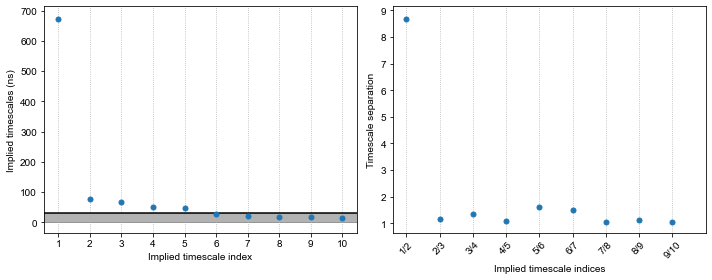

In [23]:
msm=msm_500_300
nits = 10

timescales_mean = msm.sample_mean('timescales', k=nits)
timescales_std = msm.sample_std('timescales', k=nits)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].errorbar(
    range(1, nits + 1),
    timescales_mean, 
    yerr=timescales_std, 
    fmt='.', markersize=10)
axes[1].errorbar(
    range(1, nits),
    timescales_mean[:-1] / timescales_mean[1:], 
    yerr=its_separation_err(
        timescales_mean, 
        timescales_std), 
    fmt='.', 
    markersize=10,
    color='C0')

for i, ax in enumerate(axes):
    ax.set_xticks(range(1, nits + 1))
    ax.grid(True, axis='x', linestyle=':')
    
axes[0].axhline(msm.lag * 0.1, lw=1.5, color='k')
axes[0].axhspan(0, msm.lag * 0.1, alpha=0.3, color='k')
axes[0].set_xlabel('Implied timescale index')
axes[0].set_ylabel('Implied timescales (ns)')
axes[1].set_xticks(range(1, nits))
axes[1].set_xticklabels(
    ["{:d}/{:d}".format(k, k + 1) for k in range(1, nits )],rotation=45)
axes[1].set_xlabel('Implied timescale indices')
axes[1].set_ylabel('Timescale separation')

plt.tight_layout()

fig.savefig('./plots/2-Without_IPA/9_ITS_separation_effect_cluster_size_500_300.png', dpi=600)

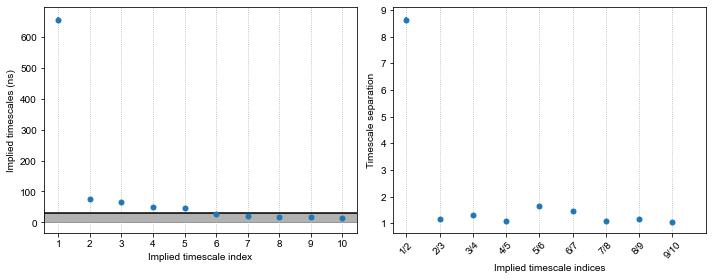

In [24]:
msm=msm_250_300
nits = 10

timescales_mean = msm.sample_mean('timescales', k=nits)
timescales_std = msm.sample_std('timescales', k=nits)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].errorbar(
    range(1, nits + 1),
    timescales_mean, 
    yerr=timescales_std, 
    fmt='.', markersize=10)
axes[1].errorbar(
    range(1, nits),
    timescales_mean[:-1] / timescales_mean[1:], 
    yerr=its_separation_err(
        timescales_mean, 
        timescales_std), 
    fmt='.', 
    markersize=10,
    color='C0')

for i, ax in enumerate(axes):
    ax.set_xticks(range(1, nits + 1))
    ax.grid(True, axis='x', linestyle=':')
    
axes[0].axhline(msm.lag * 0.1, lw=1.5, color='k')
axes[0].axhspan(0, msm.lag * 0.1, alpha=0.3, color='k')
axes[0].set_xlabel('Implied timescale index')
axes[0].set_ylabel('Implied timescales (ns)')
axes[1].set_xticks(range(1, nits))
axes[1].set_xticklabels(
    ["{:d}/{:d}".format(k, k + 1) for k in range(1, nits )],rotation=45)
axes[1].set_xlabel('Implied timescale indices')
axes[1].set_ylabel('Timescale separation')

plt.tight_layout()

fig.savefig('./plots/2-Without_IPA/9_ITS_separation_effect_cluster_size_250_300.png', dpi=600)

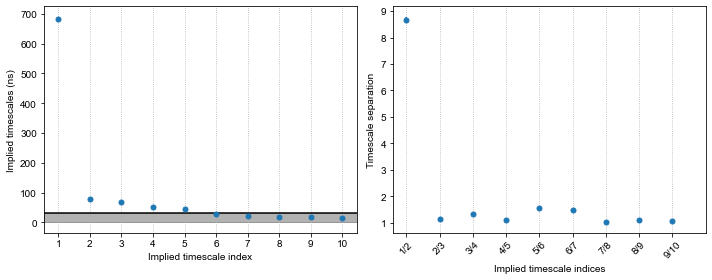

In [25]:
msm=msm_1000_300
nits = 10

timescales_mean = msm.sample_mean('timescales', k=nits)
timescales_std = msm.sample_std('timescales', k=nits)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].errorbar(
    range(1, nits + 1),
    timescales_mean, 
    yerr=timescales_std, 
    fmt='.', markersize=10)
axes[1].errorbar(
    range(1, nits),
    timescales_mean[:-1] / timescales_mean[1:], 
    yerr=its_separation_err(
        timescales_mean, 
        timescales_std), 
    fmt='.', 
    markersize=10,
    color='C0')

for i, ax in enumerate(axes):
    ax.set_xticks(range(1, nits + 1))
    ax.grid(True, axis='x', linestyle=':')
    
axes[0].axhline(msm.lag * 0.1, lw=1.5, color='k')
axes[0].axhspan(0, msm.lag * 0.1, alpha=0.3, color='k')
axes[0].set_xlabel('Implied timescale index')
axes[0].set_ylabel('Implied timescales (ns)')
axes[1].set_xticks(range(1, nits))
axes[1].set_xticklabels(
    ["{:d}/{:d}".format(k, k + 1) for k in range(1, nits )],rotation=45)
axes[1].set_xlabel('Implied timescale indices')
axes[1].set_ylabel('Timescale separation')

plt.tight_layout()

fig.savefig('./plots/2-Without_IPA/9_ITS_separation_effect_cluster_size_1000_300.png', dpi=600)

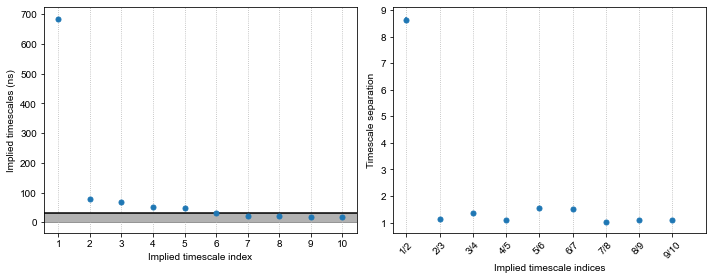

In [26]:
msm=msm_1500_300
nits = 10

timescales_mean = msm.sample_mean('timescales', k=nits)
timescales_std = msm.sample_std('timescales', k=nits)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].errorbar(
    range(1, nits + 1),
    timescales_mean, 
    yerr=timescales_std, 
    fmt='.', markersize=10)
axes[1].errorbar(
    range(1, nits),
    timescales_mean[:-1] / timescales_mean[1:], 
    yerr=its_separation_err(
        timescales_mean, 
        timescales_std), 
    fmt='.', 
    markersize=10,
    color='C0')

for i, ax in enumerate(axes):
    ax.set_xticks(range(1, nits + 1))
    ax.grid(True, axis='x', linestyle=':')
    
axes[0].axhline(msm.lag * 0.1, lw=1.5, color='k')
axes[0].axhspan(0, msm.lag * 0.1, alpha=0.3, color='k')
axes[0].set_xlabel('Implied timescale index')
axes[0].set_ylabel('Implied timescales (ns)')
axes[1].set_xticks(range(1, nits))
axes[1].set_xticklabels(
    ["{:d}/{:d}".format(k, k + 1) for k in range(1, nits )],rotation=45)
axes[1].set_xlabel('Implied timescale indices')
axes[1].set_ylabel('Timescale separation')

plt.tight_layout()

fig.savefig('./plots/2-Without_IPA/9_ITS_separation_effect_cluster_size_1500_300.png', dpi=600)

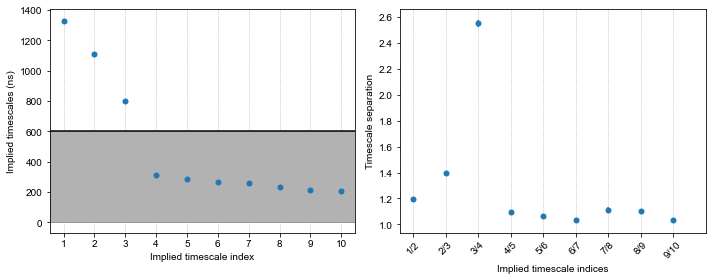

In [49]:
msm=msm_250_6000
nits = 10

timescales_mean = msm.sample_mean('timescales', k=nits)
timescales_std = msm.sample_std('timescales', k=nits)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].errorbar(
    range(1, nits + 1),
    timescales_mean, 
    yerr=timescales_std, 
    fmt='.', markersize=10)
axes[1].errorbar(
    range(1, nits),
    timescales_mean[:-1] / timescales_mean[1:], 
    yerr=its_separation_err(
        timescales_mean, 
        timescales_std), 
    fmt='.', 
    markersize=10,
    color='C0')

for i, ax in enumerate(axes):
    ax.set_xticks(range(1, nits + 1))
    ax.grid(True, axis='x', linestyle=':')
    
axes[0].axhline(msm.lag * 0.1, lw=1.5, color='k')
axes[0].axhspan(0, msm.lag * 0.1, alpha=0.3, color='k')
axes[0].set_xlabel('Implied timescale index')
axes[0].set_ylabel('Implied timescales (ns)')
axes[1].set_xticks(range(1, nits))
axes[1].set_xticklabels(
    ["{:d}/{:d}".format(k, k + 1) for k in range(1, nits )],rotation=45)
axes[1].set_xlabel('Implied timescale indices')
axes[1].set_ylabel('Timescale separation')

plt.tight_layout()

fig.savefig('./plots/2-Without_IPA/9_ITS_separation_effect_cluster_size_250_6000.png', dpi=600)

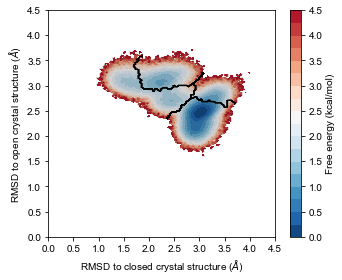

In [28]:
msm=msm_500_300
nstates=4
msm.pcca(nstates)

dtrajs_concatenated = np.concatenate(cluster_500.dtrajs)
metastable_traj = msm.metastable_assignments[dtrajs_concatenated]

black_cmap = ListedColormap(["k","k","k","k","k","k"])

diverging_colors = sns.color_palette("RdBu_r", 19)
sns_cmap = ListedColormap(diverging_colors[0:18])


fig, ax = plt.subplots(figsize=(5, 4))


pyemma.plots.plot_free_energy(
    *Y_concat[:, :2].T, 
#     weights=np.concatenate(msm.trajectory_weights()),
    ax=ax, nbins=100,
    kT=0.5825, legacy=False, alpha=1, cmap=sns_cmap,
#     vmin=0.0, vmax=5.0, 
    levels=19,
    cbar_label="Free energy (kcal/mol)"
)

_, _, misc = pyemma.plots.plot_state_map(
    *Y_concat.T, metastable_traj, ax=ax, alpha=0.15, nbins=100, cbar=False,cmap=black_cmap)


ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')
ax.set_aspect('equal')
ax.set(xlim=(0,4.5) , ylim=(0, 4.5))

ax.set_xticks(np.arange(0, 5, 0.5))
ax.set_yticks(np.arange(0, 5, 0.5))
plt.tight_layout()

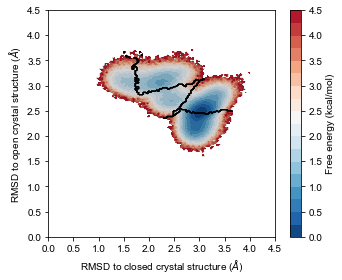

In [30]:
msm=msm_1500_300
nstates=4
msm.pcca(nstates)

dtrajs_concatenated = np.concatenate(cluster_1500.dtrajs)
metastable_traj = msm.metastable_assignments[dtrajs_concatenated]

black_cmap = ListedColormap(["k","k","k","k","k","k"])

diverging_colors = sns.color_palette("RdBu_r", 19)
sns_cmap = ListedColormap(diverging_colors[0:18])


fig, ax = plt.subplots(figsize=(5, 4))


pyemma.plots.plot_free_energy(
    *Y_concat[:, :2].T, 
#     weights=np.concatenate(msm.trajectory_weights()),
    ax=ax, nbins=100,
    kT=0.5825, legacy=False, alpha=1, cmap=sns_cmap,
#     vmin=0.0, vmax=5.0, 
    levels=19,
    cbar_label="Free energy (kcal/mol)"
)

_, _, misc = pyemma.plots.plot_state_map(
    *Y_concat.T, metastable_traj, ax=ax, alpha=0.15, nbins=100, cbar=False,cmap=black_cmap)


ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')
ax.set_aspect('equal')
ax.set(xlim=(0,4.5) , ylim=(0, 4.5))

ax.set_xticks(np.arange(0, 5, 0.5))
ax.set_yticks(np.arange(0, 5, 0.5))
plt.tight_layout()

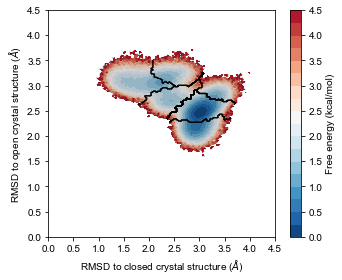

In [36]:
msm=msm_500_300
nstates=6
msm.pcca(nstates)

dtrajs_concatenated = np.concatenate(cluster_500.dtrajs)
metastable_traj = msm.metastable_assignments[dtrajs_concatenated]

black_cmap = ListedColormap(["k","k","k","k","k","k"])

diverging_colors = sns.color_palette("RdBu_r", 19)
sns_cmap = ListedColormap(diverging_colors[0:18])


fig, ax = plt.subplots(figsize=(5, 4))


pyemma.plots.plot_free_energy(
    *Y_concat[:, :2].T, 
#     weights=np.concatenate(msm.trajectory_weights()),
    ax=ax, nbins=100,
    kT=0.5825, legacy=False, alpha=1, cmap=sns_cmap,
#     vmin=0.0, vmax=5.0, 
    levels=19,
    cbar_label="Free energy (kcal/mol)"
)

_, _, misc = pyemma.plots.plot_state_map(
    *Y_concat.T, metastable_traj, ax=ax, alpha=0.15, nbins=100, cbar=False,cmap=black_cmap)


ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')
ax.set_aspect('equal')
ax.set(xlim=(0,4.5) , ylim=(0, 4.5))

ax.set_xticks(np.arange(0, 5, 0.5))
ax.set_yticks(np.arange(0, 5, 0.5))
plt.tight_layout()

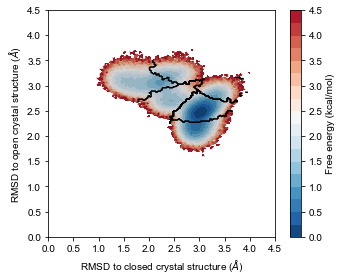

In [39]:
msm=msm_1500_300
nstates=6
msm.pcca(nstates)

dtrajs_concatenated = np.concatenate(cluster_1500.dtrajs)
metastable_traj = msm.metastable_assignments[dtrajs_concatenated]

black_cmap = ListedColormap(["k","k","k","k","k","k"])

diverging_colors = sns.color_palette("RdBu_r", 19)
sns_cmap = ListedColormap(diverging_colors[0:18])


fig, ax = plt.subplots(figsize=(5, 4))


pyemma.plots.plot_free_energy(
    *Y_concat[:, :2].T, 
#     weights=np.concatenate(msm.trajectory_weights()),
    ax=ax, nbins=100,
    kT=0.5825, legacy=False, alpha=1, cmap=sns_cmap,
#     vmin=0.0, vmax=5.0, 
    levels=19,
    cbar_label="Free energy (kcal/mol)"
)

_, _, misc = pyemma.plots.plot_state_map(
    *Y_concat.T, metastable_traj, ax=ax, alpha=0.15, nbins=100, cbar=False,cmap=black_cmap)


ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')
ax.set_aspect('equal')
ax.set(xlim=(0,4.5) , ylim=(0, 4.5))

ax.set_xticks(np.arange(0, 5, 0.5))
ax.set_yticks(np.arange(0, 5, 0.5))
plt.tight_layout()

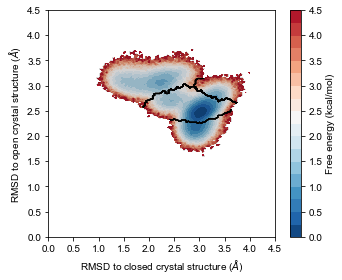

In [52]:
msm=msm_250_6000
nstates=4
msm.pcca(nstates)

dtrajs_concatenated = np.concatenate(cluster_250.dtrajs)
metastable_traj = msm.metastable_assignments[dtrajs_concatenated]

black_cmap = ListedColormap(["k","k","k","k","k","k"])

diverging_colors = sns.color_palette("RdBu_r", 19)
sns_cmap = ListedColormap(diverging_colors[0:18])


fig, ax = plt.subplots(figsize=(5, 4))


pyemma.plots.plot_free_energy(
    *Y_concat[:, :2].T, 
#     weights=np.concatenate(msm.trajectory_weights()),
    ax=ax, nbins=100,
    kT=0.5825, legacy=False, alpha=1, cmap=sns_cmap,
#     vmin=0.0, vmax=5.0, 
    levels=19,
    cbar_label="Free energy (kcal/mol)"
)

_, _, misc = pyemma.plots.plot_state_map(
    *Y_concat.T, metastable_traj, ax=ax, alpha=0.15, nbins=100, cbar=False,cmap=black_cmap)


ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')
ax.set_aspect('equal')
ax.set(xlim=(0,4.5) , ylim=(0, 4.5))

ax.set_xticks(np.arange(0, 5, 0.5))
ax.set_yticks(np.arange(0, 5, 0.5))
plt.tight_layout()

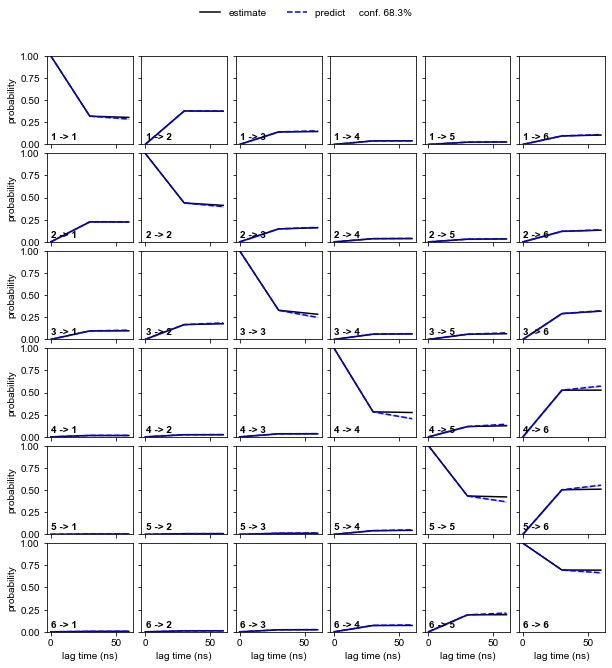

In [21]:
msm=msm_500_300
nstates=6
cktest_msm_500_300_6 = msm.cktest(nstates, mlags=3, conf=0.6827)

with open('./pickled/2-Without_IPA/1_cktest_msm_500_300_6.pickle', 'wb') as outf:
    pickle.dump(cktest_msm_500_300_6, outf)

pyemma.plots.plot_cktest(cktest_msm_500_300_6, dt=0.1, units='ns');

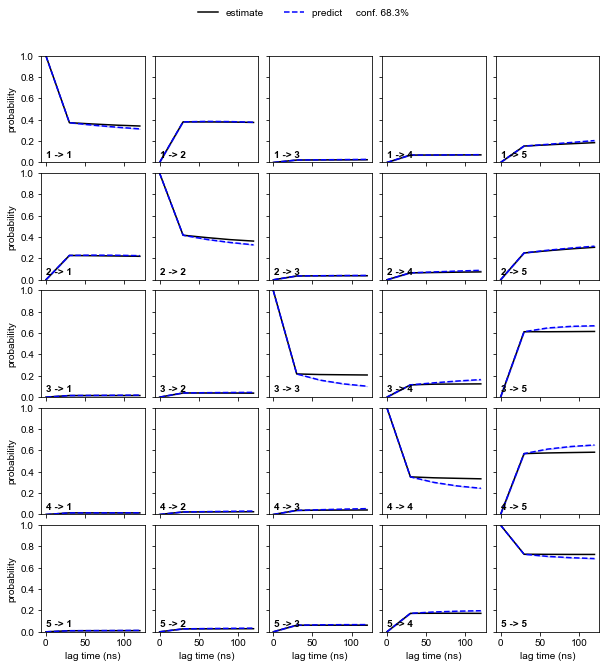

In [42]:
msm=msm_500_300
nstates=5
cktest_msm_500_300_5 = msm.cktest(nstates, mlags=5, conf=0.6827)

with open('./pickled/2-Without_IPA/1_cktest_msm_500_300_5.pickle', 'wb') as outf:
    pickle.dump(cktest_msm_500_300_5, outf)

pyemma.plots.plot_cktest(cktest_msm_500_300_5, dt=0.1, units='ns');

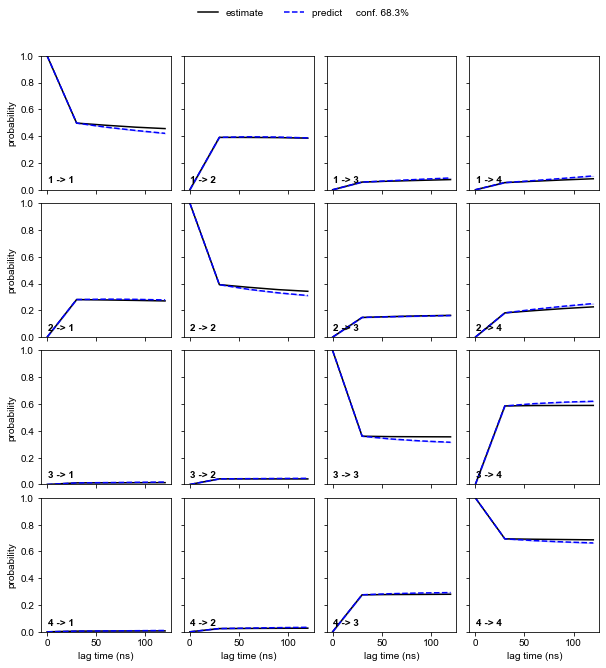

In [43]:
msm=msm_500_300
nstates=4
cktest_msm_500_300_4 = msm.cktest(nstates, mlags=5, conf=0.6827)

with open('./pickled/2-Without_IPA/1_cktest_msm_500_300_4.pickle', 'wb') as outf:
    pickle.dump(cktest_msm_500_300_4, outf)

pyemma.plots.plot_cktest(cktest_msm_500_300_4, dt=0.1, units='ns');
plt.savefig('./plots/2-Without_IPA/test2.png', dpi=600)

/home/el14718/Software/anaconda3_2019/lib/python3.7/site-packages/msmtools/analysis/api.py:367: UserWarning: truncated eigendecomposition to contain 248 components
  warnings.warn('truncated eigendecomposition to contain %s components' % new_k, category=UserWarning)


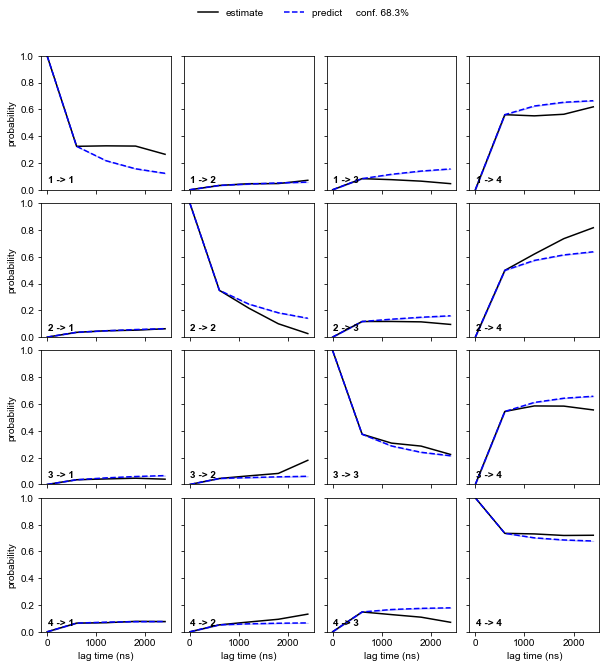

In [53]:
msm=msm_250_6000
nstates=4
cktest_msm_250_6000_4 = msm.cktest(nstates, mlags=5, conf=0.6827)

with open('./pickled/2-Without_IPA/1_cktest_msm_250_6000_4.pickle', 'wb') as outf:
    pickle.dump(cktest_msm_500_300_4, outf)

pyemma.plots.plot_cktest(cktest_msm_250_6000_4, dt=0.1, units='ns');
plt.savefig('./plots/2-Without_IPA/test.png', dpi=600)

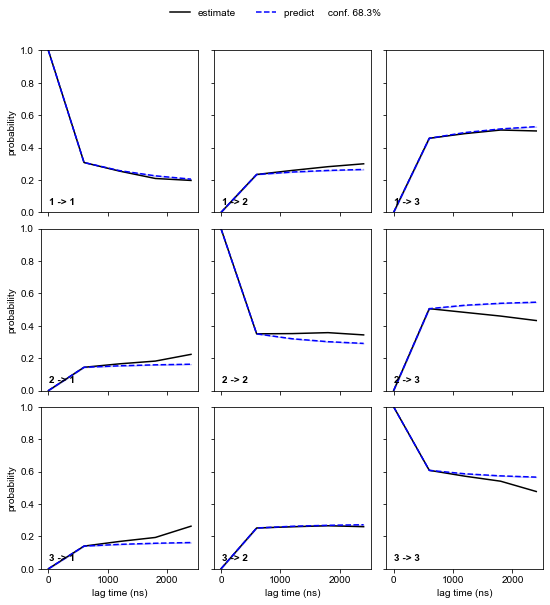

In [56]:
msm=msm_250_6000
nstates=3
cktest_msm_250_6000_3 = msm.cktest(nstates, mlags=5, conf=0.6827)

with open('./pickled/2-Without_IPA/1_cktest_msm_250_6000_3.pickle', 'wb') as outf:
    pickle.dump(cktest_msm_250_6000_3, outf)

pyemma.plots.plot_cktest(cktest_msm_250_6000_3, dt=0.1, units='ns');
plt.savefig('./plots/2-Without_IPA/test.png', dpi=600)

In [58]:
hmsm_its=pyemma.msm.timescales_hmsm(cluster_250.dtrajs, 4, lags=[10, 30, 100, 600], errors=None, nsamples=50),

<AxesSubplot:xlabel='lag time / ns', ylabel='timescale / ns'>

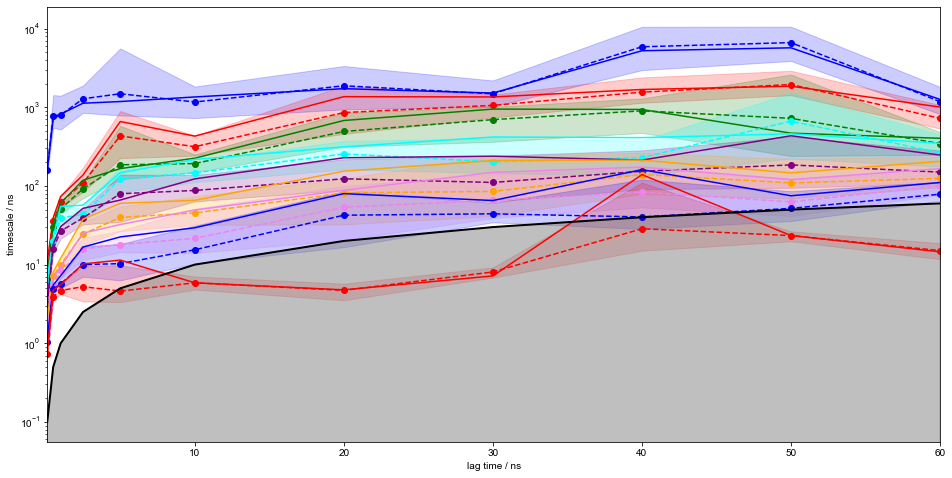

In [69]:
fig, ax = plt.subplots(figsize=(16, 8))

pyemma.plots.plot_implied_timescales(
    pyemma.msm.timescales_hmsm(cluster_500.dtrajs, 10, 
                               lags=[1,5,10,25,50,100,200,300,400,500,600], 
                               errors='bayes', nsamples=50),
    units='ns', dt=0.1, ylog=True)

Exception in thread Thread-72:
Traceback (most recent call last):
  File "/home/el14718/Software/anaconda3_2019/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/home/el14718/Software/anaconda3_2019/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/home/el14718/Software/anaconda3_2019/lib/python3.7/site-packages/multiprocess/pool.py", line 486, in _handle_results
    cache[job]._set(i, obj)
  File "/home/el14718/Software/anaconda3_2019/lib/python3.7/site-packages/multiprocess/pool.py", line 662, in _set
    self._callback(self._value)
  File "/home/el14718/Software/anaconda3_2019/lib/python3.7/site-packages/pyemma/_base/estimator.py", line 319, in <lambda>
    callback = lambda _: progress_reporter._progress_update(1, stage='param-scan')
  File "/home/el14718/Software/anaconda3_2019/lib/python3.7/site-packages/pyemma/_base/progress/reporter/__init__.py", line 176, in _progress_update
    self.__check_st

<AxesSubplot:xlabel='lag time / ns', ylabel='timescale / ns'>

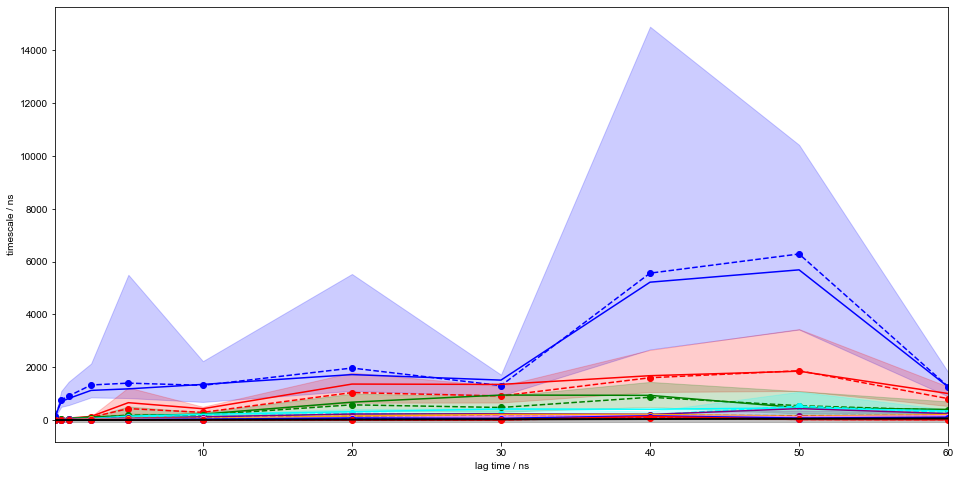

In [68]:
fig, ax = plt.subplots(figsize=(16, 8))

pyemma.plots.plot_implied_timescales(
    pyemma.msm.timescales_hmsm(cluster_500.dtrajs, 10, 
                               lags=[1,5,10,25,50,100,200,300,400,500,600], 
                               errors='bayes', nsamples=50),
    units='ns', dt=0.1, ylog=False)

In [8]:
hmsm = pyemma.msm.bayesian_hidden_markov_model(cluster_500.dtrajs, 9, 
                                                       lag=100, dt_traj='0.1 ns')
# with open('./pickled/2-Without_IPA/1_hmsm_500_200_9states.pickle', 'wb') as outf:
#     pickle.dump(hmsm_500_200, outf)

In [9]:
hmsm

BayesianHMSM(conf=0.95, connectivity=None, dt_traj='0.1 ns', init_hmsm=None,
       lag=100, mincount_connectivity=0.1111111111111111, nsamples=100,
       nstates=9, observe_nonempty=True, p0_prior='mixed', reversible=True,
       separate=None, show_progress=True, stationary=False,
       store_hidden=False, stride=13, transition_matrix_prior='mixed')

In [12]:
print('fraction of states used = {:.2f}'.format(hmsm.active_state_fraction))
print('fraction of counts used = {:.2f}'.format(hmsm.active_count_fraction))

AttributeError: 'BayesianHMSM' object has no attribute 'active_state_fraction'

In [13]:
len(hmsm.active_set)

9

/home/el14718/Software/anaconda3_2019/lib/python3.7/site-packages/pyemma/msm/estimators/lagged_model_validators.py:454: RuntimeWarning: invalid value encountered in true_divide
  self.P0 /= self.P0.sum(axis=0)  # column-normalize


21-10-20 08:46:55 pyemma.msm.estimators.bayesian_hmsm.BayesianHMSM[10] WARNING  Ignored error during estimation: index 495 is out of bounds for axis 1 with size 495


/home/el14718/Software/anaconda3_2019/lib/python3.7/site-packages/msmtools/analysis/dense/decomposition.py:395: RuntimeWarning: divide by zero encountered in true_divide
  R = R / np.sqrt(s[np.newaxis, :])
/home/el14718/Software/anaconda3_2019/lib/python3.7/site-packages/msmtools/analysis/dense/decomposition.py:395: RuntimeWarning: invalid value encountered in true_divide
  R = R / np.sqrt(s[np.newaxis, :])
/home/el14718/Software/anaconda3_2019/lib/python3.7/site-packages/msmtools/analysis/dense/decomposition.py:396: RuntimeWarning: invalid value encountered in true_divide
  L = L / np.sqrt(s[np.newaxis, :])
/home/el14718/Software/anaconda3_2019/lib/python3.7/site-packages/pyemma/util/statistics.py:59: UserWarning: confidence interval for constant data is not meaningful
  warnings.warn('confidence interval for constant data is not meaningful')


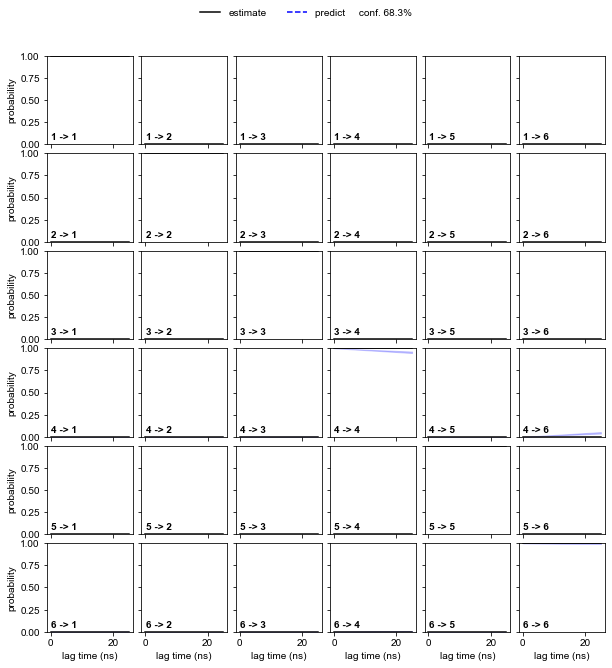

In [22]:
cktest_hmsm = hmsm.cktest(mlags=2, conf=0.6827)

pyemma.plots.plot_cktest(cktest_hmsm, dt=0.1, units='ns');


In [89]:
max(np.concatenate(cluster_500.dtrajs))

499

In [14]:
dtrajs_concatenated = np.concatenate(cluster_500.dtrajs)
metastable_traj = hmsm.metastable_assignments[dtrajs_concatenated]

black_cmap = ListedColormap(["k","k","k","k","k","k"])

diverging_colors = sns.color_palette("RdBu_r", 19)
sns_cmap = ListedColormap(diverging_colors[0:18])


fig, ax = plt.subplots(figsize=(5, 4))


pyemma.plots.plot_free_energy(
    *Y_concat[:, :2].T, 
#     weights=np.concatenate(msm.trajectory_weights()),
    ax=ax, nbins=100,
    kT=0.5825, legacy=False, alpha=1, cmap=sns_cmap,
#     vmin=0.0, vmax=5.0, 
    levels=19,
    cbar_label="Free energy (kcal/mol)"
)

_, _, misc = pyemma.plots.plot_state_map(
    *Y_concat.T, metastable_traj, ax=ax, alpha=0.15, nbins=100, cbar=False,cmap=black_cmap)


ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')
ax.set_aspect('equal')
ax.set(xlim=(0,4.5) , ylim=(0, 4.5))

ax.set_xticks(np.arange(0, 5, 0.5))
ax.set_yticks(np.arange(0, 5, 0.5))
plt.tight_layout()

IndexError: index 499 is out of bounds for axis 0 with size 499

IndexError: index 499 is out of bounds for axis 0 with size 499

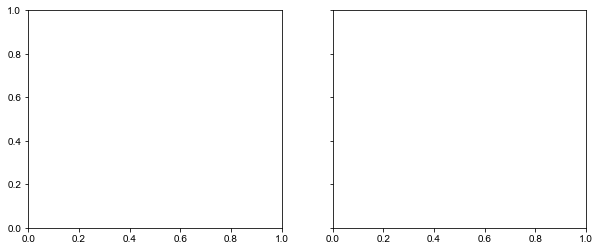

In [15]:
dtrajs_concatenated = np.concatenate(cluster_500.dtrajs)

fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True)
for hmm, ax in zip([hmsm, hmsm], axes.flat):
    _, _, misc = pyemma.plots.plot_state_map(
        *Y_concat.T,
        hmm.metastable_assignments[dtrajs_concatenated], 
        ax=ax)
    ax.set_title('HMM with {} hidden states'.format(hmm.nstates))
    ax.set_xlabel('$\Phi$')
    misc['cbar'].set_ticklabels(range(1, hmm.nstates + 1))
axes[0].set_ylabel('$\Psi$')
fig.tight_layout()

In [35]:
msm_500_6000 = pyemma.msm.bayesian_markov_model(cluster_500.dtrajs, lag=6000, dt_traj='0.1 ns')

fraction of states used = 1.00
fraction of counts used = 1.00


In [51]:
msm_500_1500 = pyemma.msm.bayesian_markov_model(cluster_500.dtrajs, lag=1500, dt_traj='0.1 ns')

fraction of states used = 1.00
fraction of counts used = 1.00


In [13]:
msm_500_100 = pyemma.msm.bayesian_markov_model(cluster_500.dtrajs, lag=100, dt_traj='0.1 ns')


AttributeError: 'KmeansClustering' object has no attribute '_default_chunksize'

In [52]:
with open('./pickled/2-Without_IPA/1_msm_500_300.pickle', 'wb') as outf:
    pickle.dump(msm_500_300, outf)
    
with open('./pickled/2-Without_IPA/1_msm_500_600.pickle', 'wb') as outf:
    pickle.dump(msm_500_600, outf)
    
with open('./pickled/2-Without_IPA/1_msm_500_6000.pickle', 'wb') as outf:
    pickle.dump(msm_500_6000, outf)
    
with open('./pickled/2-Without_IPA/1_msm_500_1500.pickle', 'wb') as outf:
    pickle.dump(msm_500_1500, outf)
    
# with open('./pickled/2-Without_IPA/1_msm_500_300.pickle', 'rb') as inf:
#     msm_500_300 = pickle.load(inf)

# with open('./pickled/2-Without_IPA/1_msm_500_600.pickle', 'rb') as inf:
#     msm_500_600 = pickle.load(inf)

# with open('./pickled/2-Without_IPA/1_msm_500_6000.pickle', 'rb') as inf:
#     msm_500_6000 = pickle.load(inf)

# with open('./pickled/2-Without_IPA/1_msm_500_1500.pickle', 'rb') as inf:
#     msm_500_1500 = pickle.load(inf)

Text(0, 0.5, 'timescale separation')

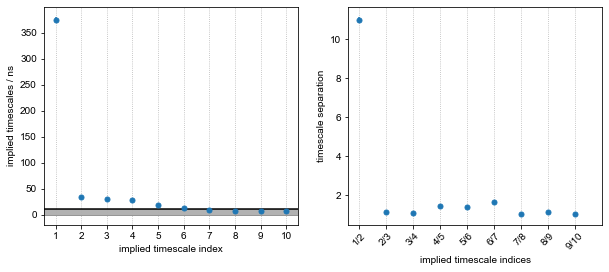

In [66]:
def its_separation_err(ts, ts_err):
    """
    Error propagation from ITS standard deviation to timescale separation.
    """
    return ts[:-1] / ts[1:] * np.sqrt(
        (ts_err[:-1] / ts[:-1])**2 + (ts_err[1:] / ts[1:])**2)

msm=msm_500_100
nits = 10

timescales_mean = msm.sample_mean('timescales', k=nits)
timescales_std = msm.sample_std('timescales', k=nits)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].errorbar(
    range(1, nits + 1),
    timescales_mean, 
    yerr=timescales_std, 
    fmt='.', markersize=10)
axes[1].errorbar(
    range(1, nits),
    timescales_mean[:-1] / timescales_mean[1:], 
    yerr=its_separation_err(
        timescales_mean, 
        timescales_std), 
    fmt='.', 
    markersize=10,
    color='C0')

for i, ax in enumerate(axes):
    ax.set_xticks(range(1, nits + 1))
    ax.grid(True, axis='x', linestyle=':')
    
axes[0].axhline(msm.lag * 0.1, lw=1.5, color='k')
axes[0].axhspan(0, msm.lag * 0.1, alpha=0.3, color='k')
axes[0].set_xlabel('implied timescale index')
axes[0].set_ylabel('implied timescales / ns')
axes[1].set_xticks(range(1, nits))
axes[1].set_xticklabels(
    ["{:d}/{:d}".format(k, k + 1) for k in range(1, nits )],rotation=45)
axes[1].set_xlabel('implied timescale indices')
axes[1].set_ylabel('timescale separation')

Text(0, 0.5, 'timescale separation')

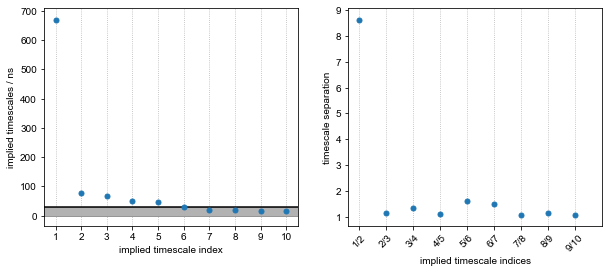

In [47]:
def its_separation_err(ts, ts_err):
    """
    Error propagation from ITS standard deviation to timescale separation.
    """
    return ts[:-1] / ts[1:] * np.sqrt(
        (ts_err[:-1] / ts[:-1])**2 + (ts_err[1:] / ts[1:])**2)

msm=msm_500_300
nits = 10

timescales_mean = msm.sample_mean('timescales', k=nits)
timescales_std = msm.sample_std('timescales', k=nits)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].errorbar(
    range(1, nits + 1),
    timescales_mean, 
    yerr=timescales_std, 
    fmt='.', markersize=10)
axes[1].errorbar(
    range(1, nits),
    timescales_mean[:-1] / timescales_mean[1:], 
    yerr=its_separation_err(
        timescales_mean, 
        timescales_std), 
    fmt='.', 
    markersize=10,
    color='C0')

for i, ax in enumerate(axes):
    ax.set_xticks(range(1, nits + 1))
    ax.grid(True, axis='x', linestyle=':')
    
axes[0].axhline(msm.lag * 0.1, lw=1.5, color='k')
axes[0].axhspan(0, msm.lag * 0.1, alpha=0.3, color='k')
axes[0].set_xlabel('implied timescale index')
axes[0].set_ylabel('implied timescales / ns')
axes[1].set_xticks(range(1, nits))
axes[1].set_xticklabels(
    ["{:d}/{:d}".format(k, k + 1) for k in range(1, nits )],rotation=45)
axes[1].set_xlabel('implied timescale indices')
axes[1].set_ylabel('timescale separation')

# fig.savefig('./plots/2-Without_IPA/9_its_separation.png', dpi=600)

Text(0, 0.5, 'timescale separation')

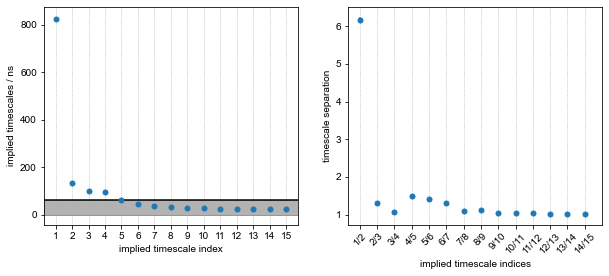

In [48]:
def its_separation_err(ts, ts_err):
    """
    Error propagation from ITS standard deviation to timescale separation.
    """
    return ts[:-1] / ts[1:] * np.sqrt(
        (ts_err[:-1] / ts[:-1])**2 + (ts_err[1:] / ts[1:])**2)

msm=msm_500_600
nits = 15

timescales_mean = msm.sample_mean('timescales', k=nits)
timescales_std = msm.sample_std('timescales', k=nits)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].errorbar(
    range(1, nits + 1),
    timescales_mean, 
    yerr=timescales_std, 
    fmt='.', markersize=10)
axes[1].errorbar(
    range(1, nits),
    timescales_mean[:-1] / timescales_mean[1:], 
    yerr=its_separation_err(
        timescales_mean, 
        timescales_std), 
    fmt='.', 
    markersize=10,
    color='C0')

for i, ax in enumerate(axes):
    ax.set_xticks(range(1, nits + 1))
    ax.grid(True, axis='x', linestyle=':')
    
axes[0].axhline(msm.lag * 0.1, lw=1.5, color='k')
axes[0].axhspan(0, msm.lag * 0.1, alpha=0.3, color='k')
axes[0].set_xlabel('implied timescale index')
axes[0].set_ylabel('implied timescales / ns')
axes[1].set_xticks(range(1, nits))
axes[1].set_xticklabels(
    ["{:d}/{:d}".format(k, k + 1) for k in range(1, nits)],rotation=45)
axes[1].set_xlabel('implied timescale indices')
axes[1].set_ylabel('timescale separation')

# fig.savefig('./plots/2-Without_IPA/9_its_separation.png', dpi=600)

Text(0, 0.5, 'timescale separation')

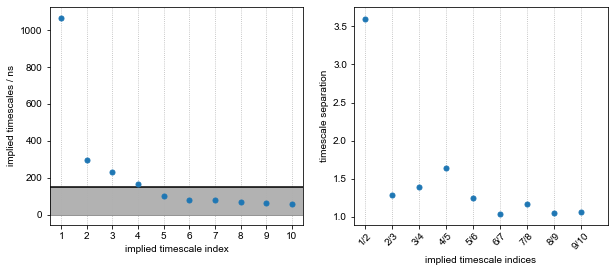

In [53]:
def its_separation_err(ts, ts_err):
    """
    Error propagation from ITS standard deviation to timescale separation.
    """
    return ts[:-1] / ts[1:] * np.sqrt(
        (ts_err[:-1] / ts[:-1])**2 + (ts_err[1:] / ts[1:])**2)

msm=msm_500_1500
nits = 10

timescales_mean = msm.sample_mean('timescales', k=nits)
timescales_std = msm.sample_std('timescales', k=nits)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].errorbar(
    range(1, nits + 1),
    timescales_mean, 
    yerr=timescales_std, 
    fmt='.', markersize=10)
axes[1].errorbar(
    range(1, nits),
    timescales_mean[:-1] / timescales_mean[1:], 
    yerr=its_separation_err(
        timescales_mean, 
        timescales_std), 
    fmt='.', 
    markersize=10,
    color='C0')

for i, ax in enumerate(axes):
    ax.set_xticks(range(1, nits + 1))
    ax.grid(True, axis='x', linestyle=':')
    
axes[0].axhline(msm.lag * 0.1, lw=1.5, color='k')
axes[0].axhspan(0, msm.lag * 0.1, alpha=0.3, color='k')
axes[0].set_xlabel('implied timescale index')
axes[0].set_ylabel('implied timescales / ns')
axes[1].set_xticks(range(1, nits))
axes[1].set_xticklabels(
    ["{:d}/{:d}".format(k, k + 1) for k in range(1, nits)],rotation=45)
axes[1].set_xlabel('implied timescale indices')
axes[1].set_ylabel('timescale separation')

# fig.savefig('./plots/2-Without_IPA/9_its_separation.png', dpi=600)

Text(0, 0.5, 'timescale separation')

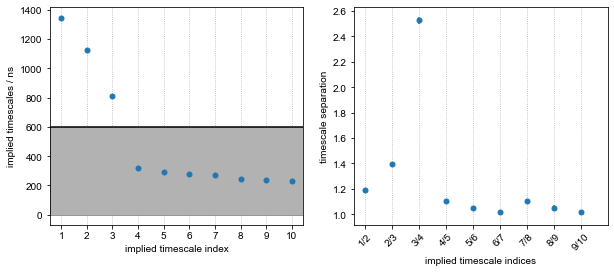

In [50]:
def its_separation_err(ts, ts_err):
    """
    Error propagation from ITS standard deviation to timescale separation.
    """
    return ts[:-1] / ts[1:] * np.sqrt(
        (ts_err[:-1] / ts[:-1])**2 + (ts_err[1:] / ts[1:])**2)

msm=msm_500_6000
nits = 10

timescales_mean = msm.sample_mean('timescales', k=nits)
timescales_std = msm.sample_std('timescales', k=nits)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].errorbar(
    range(1, nits + 1),
    timescales_mean, 
    yerr=timescales_std, 
    fmt='.', markersize=10)
axes[1].errorbar(
    range(1, nits),
    timescales_mean[:-1] / timescales_mean[1:], 
    yerr=its_separation_err(
        timescales_mean, 
        timescales_std), 
    fmt='.', 
    markersize=10,
    color='C0')

for i, ax in enumerate(axes):
    ax.set_xticks(range(1, nits + 1))
    ax.grid(True, axis='x', linestyle=':')
    
axes[0].axhline(msm.lag * 0.1, lw=1.5, color='k')
axes[0].axhspan(0, msm.lag * 0.1, alpha=0.3, color='k')
axes[0].set_xlabel('implied timescale index')
axes[0].set_ylabel('implied timescales / ns')
axes[1].set_xticks(range(1, nits))
axes[1].set_xticklabels(
    ["{:d}/{:d}".format(k, k + 1) for k in range(1, nits)],rotation=45)
axes[1].set_xlabel('implied timescale indices')
axes[1].set_ylabel('timescale separation')

# fig.savefig('./plots/2-Without_IPA/9_its_separation.png', dpi=600)

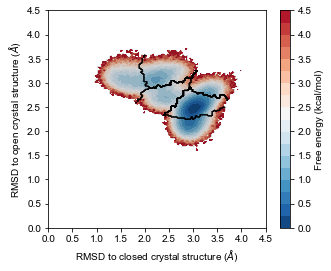

In [67]:
msm=msm_500_100
nstates=6
msm.pcca(nstates)

dtrajs_concatenated = np.concatenate(cluster_500.dtrajs)
metastable_traj = msm.metastable_assignments[dtrajs_concatenated]

black_cmap = ListedColormap(["k","k","k","k","k","k"])

diverging_colors = sns.color_palette("RdBu_r", 19)
sns_cmap = ListedColormap(diverging_colors[0:18])


fig, ax = plt.subplots(figsize=(5, 4))


pyemma.plots.plot_free_energy(
    *Y_concat[:, :2].T, 
#     weights=np.concatenate(msm.trajectory_weights()),
    ax=ax, nbins=100,
    kT=0.5825, legacy=False, alpha=1, cmap=sns_cmap,
#     vmin=0.0, vmax=5.0, 
    levels=19,
    cbar_label="Free energy (kcal/mol)"
)

_, _, misc = pyemma.plots.plot_state_map(
    *Y_concat.T, metastable_traj, ax=ax, alpha=0.15, nbins=100, cbar=False,cmap=black_cmap)


ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')
ax.set_aspect('equal')
ax.set(xlim=(0,4.5) , ylim=(0, 4.5))

ax.set_xticks(np.arange(0, 5, 0.5))
ax.set_yticks(np.arange(0, 5, 0.5))

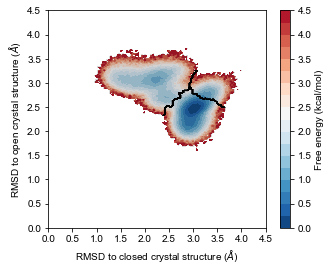

In [56]:
msm=msm_500_6000
nstates=3
msm.pcca(nstates)

dtrajs_concatenated = np.concatenate(cluster_500.dtrajs)
metastable_traj = msm.metastable_assignments[dtrajs_concatenated]

black_cmap = ListedColormap(["k","k","k","k","k","k"])

diverging_colors = sns.color_palette("RdBu_r", 19)
sns_cmap = ListedColormap(diverging_colors[0:18])


fig, ax = plt.subplots(figsize=(5, 4))


pyemma.plots.plot_free_energy(
    *Y_concat[:, :2].T, 
#     weights=np.concatenate(msm.trajectory_weights()),
    ax=ax, nbins=100,
    kT=0.5825, legacy=False, alpha=1, cmap=sns_cmap,
#     vmin=0.0, vmax=5.0, 
    levels=19,
    cbar_label="Free energy (kcal/mol)"
)

_, _, misc = pyemma.plots.plot_state_map(
    *Y_concat.T, metastable_traj, ax=ax, alpha=0.15, nbins=100, cbar=False,cmap=black_cmap)


ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')
ax.set_aspect('equal')
ax.set(xlim=(0,4.5) , ylim=(0, 4.5))

ax.set_xticks(np.arange(0, 5, 0.5))
ax.set_yticks(np.arange(0, 5, 0.5))

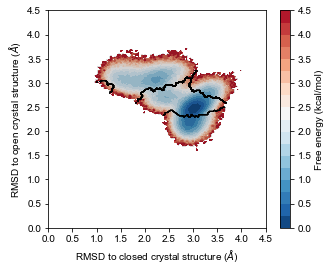

In [77]:
msm=msm_500_1500
nstates=4
msm.pcca(nstates)

dtrajs_concatenated = np.concatenate(cluster_500.dtrajs)
metastable_traj = msm.metastable_assignments[dtrajs_concatenated]

black_cmap = ListedColormap(["k","k","k","k","k","k"])

diverging_colors = sns.color_palette("RdBu_r", 19)
sns_cmap = ListedColormap(diverging_colors[0:18])


fig, ax = plt.subplots(figsize=(5, 4))


pyemma.plots.plot_free_energy(
    *Y_concat[:, :2].T, 
#     weights=np.concatenate(msm.trajectory_weights()),
    ax=ax, nbins=100,
    kT=0.5825, legacy=False, alpha=1, cmap=sns_cmap,
#     vmin=0.0, vmax=5.0, 
    levels=19,
    cbar_label="Free energy (kcal/mol)"
)

_, _, misc = pyemma.plots.plot_state_map(
    *Y_concat.T, metastable_traj, ax=ax, alpha=0.15, nbins=100, cbar=False,cmap=black_cmap)


ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')
ax.set_aspect('equal')
ax.set(xlim=(0,4.5) , ylim=(0, 4.5))

ax.set_xticks(np.arange(0, 5, 0.5))
ax.set_yticks(np.arange(0, 5, 0.5))

In [68]:
msm=msm_500_100
nstates=6
cktest6 = msm.cktest(nstates)



In [69]:
with open('./pickled/2-Without_IPA/1_msm_500_100_cktest6.pickle', 'wb') as outf:
    pickle.dump(cktest6, outf)

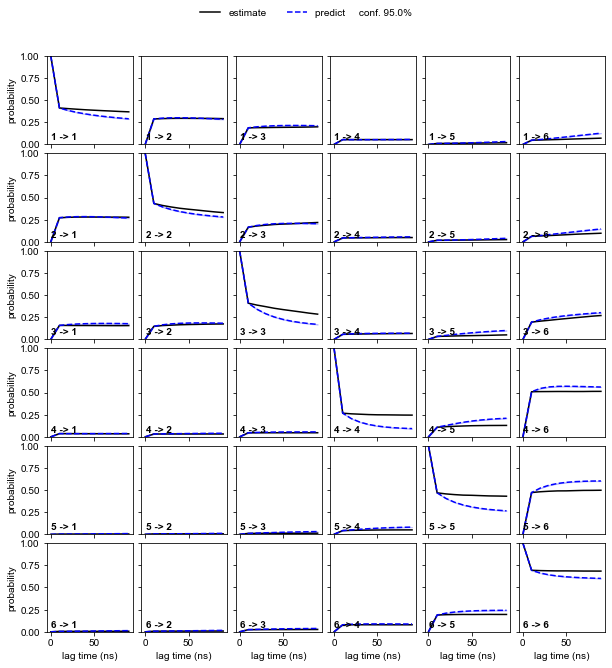

In [70]:
pyemma.plots.plot_cktest(cktest6, dt=0.1, units='ns');

Exception in thread Thread-45:
Traceback (most recent call last):
  File "/home/el14718/Software/anaconda3_2019/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/home/el14718/Software/anaconda3_2019/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/home/el14718/Software/anaconda3_2019/lib/python3.7/site-packages/multiprocess/pool.py", line 486, in _handle_results
    cache[job]._set(i, obj)
  File "/home/el14718/Software/anaconda3_2019/lib/python3.7/site-packages/multiprocess/pool.py", line 662, in _set
    self._callback(self._value)
  File "/home/el14718/Software/anaconda3_2019/lib/python3.7/site-packages/pyemma/_base/estimator.py", line 319, in <lambda>
    callback = lambda _: progress_reporter._progress_update(1, stage='param-scan')
  File "/home/el14718/Software/anaconda3_2019/lib/python3.7/site-packages/pyemma/_base/progress/reporter/__init__.py", line 176, in _progress_update
    self.__check_st

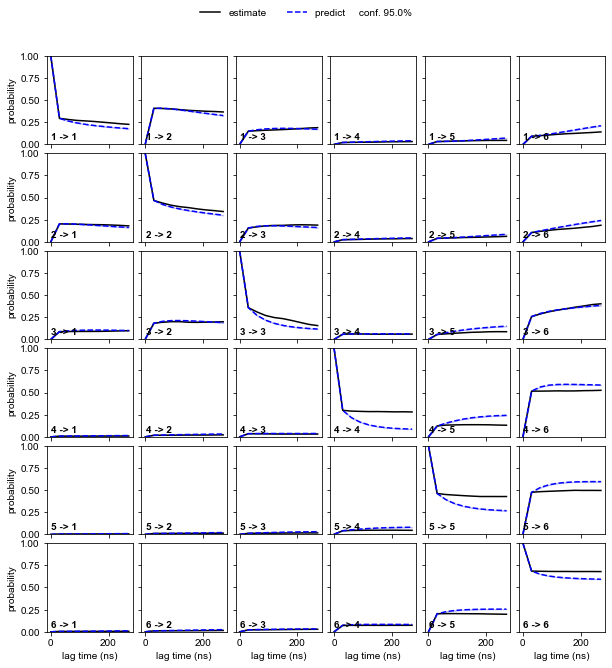

In [75]:
msm=msm_500_300
nstates=6
cktest_msm_500_300_6 = msm.cktest(nstates)

with open('./pickled/2-Without_IPA/1_cktest_msm_500_300_6.pickle', 'wb') as outf:
    pickle.dump(cktest_msm_500_300_6, outf)

    pyemma.plots.plot_cktest(cktest_msm_500_300_6, dt=0.1, units='ns');

13-10-20 17:12:37 pyemma.msm.estimators.lagged_model_validators.ChapmanKolmogorovValidator[29] WARNING  Changed mlags as some mlags exceeded maximum trajectory length.


/home/el14718/Software/anaconda3_2019/lib/python3.7/site-packages/msmtools/analysis/api.py:367: UserWarning: truncated eigendecomposition to contain 498 components
  warnings.warn('truncated eigendecomposition to contain %s components' % new_k, category=UserWarning)
/home/el14718/Software/anaconda3_2019/lib/python3.7/site-packages/msmtools/analysis/api.py:367: UserWarning: truncated eigendecomposition to contain 490 components
  warnings.warn('truncated eigendecomposition to contain %s components' % new_k, category=UserWarning)
/home/el14718/Software/anaconda3_2019/lib/python3.7/site-packages/msmtools/analysis/api.py:367: UserWarning: truncated eigendecomposition to contain 209 components
  warnings.warn('truncated eigendecomposition to contain %s components' % new_k, category=UserWarning)


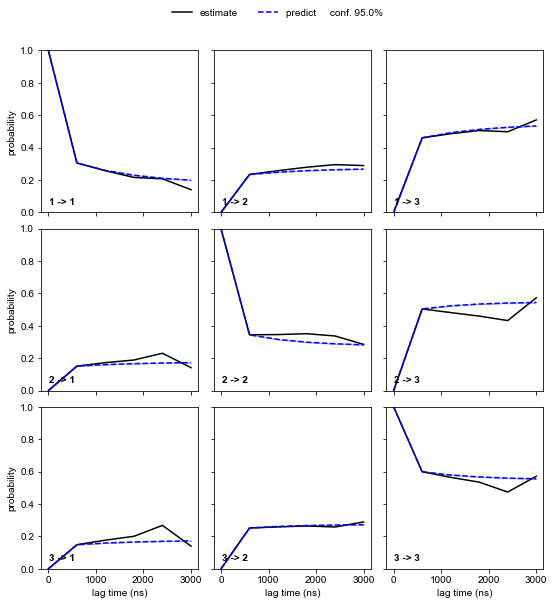

In [76]:
msm=msm_500_6000
nstates=3
cktest_msm_500_6000_3 = msm.cktest(nstates)

with open('./pickled/2-Without_IPA/1_cktest_msm_500_6000_3.pickle', 'wb') as outf:
    pickle.dump(cktest_msm_500_6000_3, outf)

    pyemma.plots.plot_cktest(cktest_msm_500_6000_3, dt=0.1, units='ns');

/home/el14718/Software/anaconda3_2019/lib/python3.7/site-packages/msmtools/analysis/api.py:367: UserWarning: truncated eigendecomposition to contain 499 components
  warnings.warn('truncated eigendecomposition to contain %s components' % new_k, category=UserWarning)
/home/el14718/Software/anaconda3_2019/lib/python3.7/site-packages/msmtools/analysis/api.py:367: UserWarning: truncated eigendecomposition to contain 498 components
  warnings.warn('truncated eigendecomposition to contain %s components' % new_k, category=UserWarning)


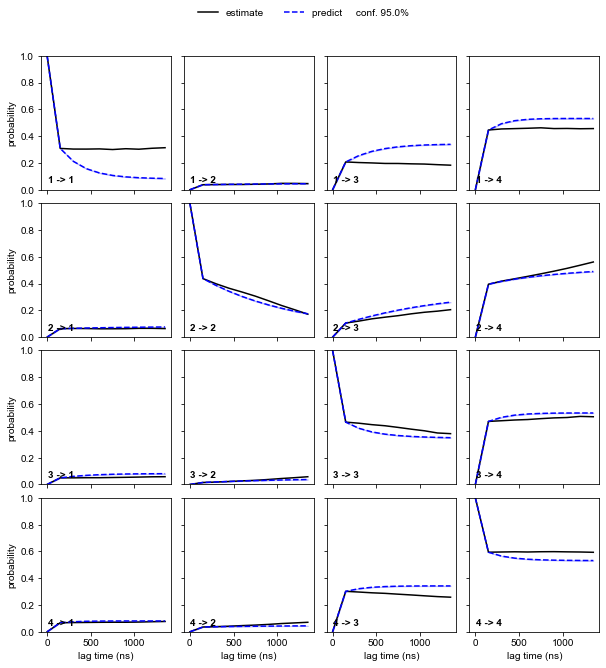

In [78]:
msm=msm_500_1500
nstates=4
cktest_msm_500_1500_3 = msm.cktest(nstates)

with open('./pickled/2-Without_IPA/1_cktest_msm_500_1500_3.pickle', 'wb') as outf:
    pickle.dump(cktest_msm_500_1500_3, outf)

    pyemma.plots.plot_cktest(cktest_msm_500_1500_3, dt=0.1, units='ns');

In [ ]:
def its_separation_err(ts, ts_err):
    """
    Error propagation from ITS standard deviation to timescale separation.
    """
    return ts[:-1] / ts[1:] * np.sqrt(
        (ts_err[:-1] / ts[:-1])**2 + (ts_err[1:] / ts[1:])**2)


nits = 10

timescales_mean = msm.sample_mean('timescales', k=nits)
timescales_std = msm.sample_std('timescales', k=nits)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].errorbar(
    range(1, nits + 1),
    timescales_mean, 
    yerr=timescales_std, 
    fmt='.', markersize=10)
axes[1].errorbar(
    range(1, nits),
    timescales_mean[:-1] / timescales_mean[1:], 
    yerr=its_separation_err(
        timescales_mean, 
        timescales_std), 
    fmt='.', 
    markersize=10,
    color='C0')

for i, ax in enumerate(axes):
    ax.set_xticks(range(1, nits + 1))
    ax.grid(True, axis='x', linestyle=':')
    
axes[0].axhline(msm.lag * 0.1, lw=1.5, color='k')
axes[0].axhspan(0, msm.lag * 0.1, alpha=0.3, color='k')
axes[0].set_xlabel('implied timescale index')
axes[0].set_ylabel('implied timescales / ns')
axes[1].set_xticks(range(1, nits))
axes[1].set_xticklabels(
    ["{:d}/{:d}".format(k, k + 1) for k in range(1, nits + 2)],
    rotation=45)
axes[1].set_xlabel('implied timescale indices')
axes[1].set_ylabel('timescale separation')

fig.savefig('./plots/2-Without_IPA/9_its_separation.png', dpi=600)

In [ ]:
eigvec = msm.eigenvectors_right()
print('The first eigenvector is one: {} (min={}, max={})'.format(
    np.allclose(eigvec[:, 0], 1, atol=1e-15), eigvec[:, 0].min(), eigvec[:, 0].max()))

fig, axes = plt.subplots(2, 4, figsize=(15, 6), sharex=True, sharey=True)
for i, ax in enumerate(axes.flat):
    pyemma.plots.plot_contour(
        *Y_concat[:, :2].T,
        eigvec[dtrajs_concatenated, i + 1],
        ax=ax,
        cmap='PiYG',
        cbar_label='{}. right eigenvector'.format(i + 2),
        mask=True)
    
    ax.set_xlim(0,4.5)
    ax.set_xticks(np.arange(0, 5, 0.5))
    ax.set_aspect('equal')

axes[1,0].set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
axes[1,1].set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
axes[1,2].set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
axes[1,3].set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
axes[0,0].set_ylim(0,4.5)
axes[0,0].set_yticks(np.arange(0, 5, 0.5))
axes[0,0].set_ylabel(r'RMSD to open crystal structure ($\AA$)')
axes[1,0].set_ylim(0,4.5)
axes[1,0].set_yticks(np.arange(0, 5, 0.5))
axes[1,0].set_ylabel(r'RMSD to open crystal structure ($\AA$)')

# fig.tight_layout()
fig.savefig('./plots/2-Without_IPA/10_eigenvectors.png', dpi=600)

## PCCA metastable states

In [21]:
nstates=6
msm.pcca(nstates)

dtrajs_concatenated = np.concatenate(cluster.dtrajs)
metastable_traj = msm.metastable_assignments[dtrajs_concatenated]

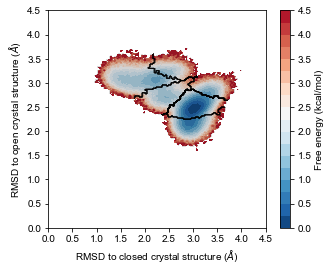

In [38]:
black_cmap = ListedColormap(["k","k","k","k","k","k"])

diverging_colors = sns.color_palette("RdBu_r", 19)
sns_cmap = ListedColormap(diverging_colors[0:18])


fig, ax = plt.subplots(figsize=(5, 4))


pyemma.plots.plot_free_energy(
    *Y_concat[:, :2].T, 
#     weights=np.concatenate(msm.trajectory_weights()),
    ax=ax, nbins=100,
    kT=0.5825, legacy=False, alpha=1, cmap=sns_cmap,
#     vmin=0.0, vmax=5.0, 
    levels=19,
    cbar_label="Free energy (kcal/mol)"
)

_, _, misc = pyemma.plots.plot_state_map(
    *Y_concat.T, metastable_traj, ax=ax, alpha=0.15, nbins=100, cbar=False,cmap=black_cmap)


ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')
ax.set_aspect('equal')
ax.set(xlim=(0,4.5) , ylim=(0, 4.5))

ax.set_xticks(np.arange(0, 5, 0.5))
ax.set_yticks(np.arange(0, 5, 0.5))

fig.savefig('./plots/2-Without_IPA/11_metastable_state_bondaries.png', dpi=600)

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=False)

_, _, misc = pyemma.plots.plot_state_map(
    *Y_concat[:, :2].T, metastable_traj, ax=axes[0], zorder=-1, nbins=100)

misc['cbar'].set_ticklabels(range(1, nstates + 1))  # set state numbers 1 ... nstates

pyemma.plots.plot_free_energy(
    *Y_concat[:, :2].T, 
    weights=np.concatenate(msm.trajectory_weights()),
    ax=axes[1], nbins=100,
    kT=0.5825, legacy=False,
#     vmin=0.0, vmax=5.0, levels=100,
    cbar_label="Free energy (kcal/mol)"
)

axes[0].set_title('Metastable states', fontweight='bold')
axes[1].set_title('Reweighted free energy surface', fontweight='bold')

axes[0].set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
axes[0].set_ylabel(r'RMSD to open crystal structure ($\AA$)')
axes[0].set(xlim=(0,4.5) , ylim=(0, 4.5))
axes[0].set_xticks(np.arange(0, 5, 0.5))
axes[0].set_yticks(np.arange(0, 5, 0.5))

axes[1].set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
axes[1].set_ylabel(r'RMSD to open crystal structure ($\AA$)')
axes[1].set(xlim=(0,4.5) , ylim=(0, 4.5))
axes[1].set_xticks(np.arange(0, 5, 0.5))
axes[1].set_yticks(np.arange(0, 5, 0.5))


axes[0].set_aspect('equal')
axes[1].set_aspect('equal')


# fig.savefig('./plots/12_metastable_states.png', dpi=600)

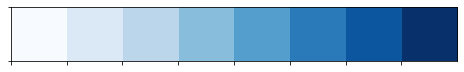

In [37]:
hexlist=[]

cmap = cm.get_cmap("Blues",8)    # PiYG

for i in range(cmap.N):
    rgb = cmap(i)[:3] # will return rgba, we take only first 3 so we get rgb
    hexlist.append(matplotlib.colors.rgb2hex(rgb))
sns.set_palette(hexlist)
sns.palplot(sns.color_palette())
# my_cmap=[hexlist[2],hexlist[1],hexlist[3],hexlist[4],hexlist[6],hexlist[5]]
my_cmap=ListedColormap([hexlist[3],hexlist[2],hexlist[4],hexlist[5],hexlist[7],hexlist[6]])

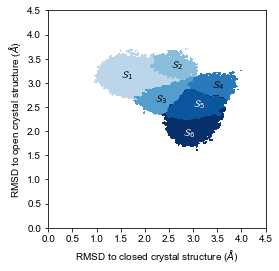

In [25]:
fig, ax = plt.subplots(figsize=(5, 4))

_, _, misc = pyemma.plots.plot_state_map(
    *Y_concat[:, :2].T, metastable_traj, ax=ax, 
    cmap=my_cmap, cbar=False,
    zorder=-1, nbins=100)

# misc['cbar'].set_ticklabels(range(1, nstates + 1))  # set state numbers 1 ... nstates

ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')
ax.set(xlim=(0,4.5) , ylim=(0, 4.5))
ax.set_xticks(np.arange(0, 5, 0.5))
ax.set_yticks(np.arange(0, 5, 0.5))
ax.set_aspect('equal')

ax.text(1.5,3.1,r'$\mathcal{S}_1$',c='k')
ax.text(2.55,3.3,r'$\mathcal{S}_2$',c='k')
ax.text(2.2,2.6,r'$\mathcal{S}_3$',c='k')
ax.text(3.4,2.9,r'$\mathcal{S}_4$',c='k')
ax.text(3.,2.5,r'$\mathcal{S}_5$',c='w' )
ax.text(2.8,1.9,r'$\mathcal{S}_6$',c='w' )

fig.savefig('./plots/2-Without_IPA/12_metastable_states.png', dpi=600)

In [ ]:
pcca_samples = msm.sample_by_distributions(msm.metastable_distributions, 1000)

In [ ]:
traj_source = pyemma.coordinates.source(traj_list, top=topfile, stride=1)
pyemma.coordinates.save_trajs(
    traj_source,
    pcca_samples,
    outfiles=['./sample_structures/2-Without_IPA/1-MSM_1000_samples/pcca{}_samples.xtc'.format(n + 1)
              for n in range(msm.n_metastable)])

### Position metastable samples 

In [ ]:
indir_sample = './sample_structures/2-Without_IPA/1-MSM_1000_samples'
traj_list_sample = sorted(glob(indir_sample+'/*.xtc'))
traj_list_sample

In [ ]:
results_open_sample=[]
results_closed_sample=[]
for t in traj_list_sample:
    traj=pt.load(t, topfile, stride=1)
    rmsd0=pt.rmsd(traj,ref=rf0, mask="@CA,N,C,O")
    rmsd1=pt.rmsd(traj,ref=rf1, mask="@CA,N,C,O")
    rmsd2=pt.rmsd(traj,ref=rf2, mask="@CA,N,C,O")
    rmsd3=pt.rmsd(traj,ref=rf3, mask="@CA,N,C,O")
    rmsd4=pt.rmsd(traj,ref=rf4, mask="@CA,N,C,O")
    rmsd5=pt.rmsd(traj,ref=rf5, mask="@CA,N,C,O")
    
    rmsd_closed=np.nanmin(np.array([rmsd0,rmsd1,rmsd2,rmsd3,rmsd4,rmsd5]), axis=0)
    results_closed_sample.append(rmsd_closed)
    
    rmsd_open=pt.rmsd(traj,ref=rfopen, mask="@CA,N,C,O")
    results_open_sample.append(rmsd_open)

In [ ]:
rmsd_open_sample=np.concatenate(results_open_sample, axis=0)
rmsd_closed_sample=np.concatenate(results_closed_sample, axis=0)

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))

pyemma.plots.plot_free_energy(
    *Y_concat[:, :2].T, 
    weights=np.concatenate(msm.trajectory_weights()),
    ax=ax, nbins=100,
    kT=0.5825, 
    cbar=False
)

ax.plot(rmsd_closed_sample, rmsd_open_sample, linewidth=0, marker='o', markersize=0.5, color='white')

ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')
ax.set_aspect('equal')

fig.savefig('./plots/1-With_IPA/13_sample_structures.png', dpi=600)

## MFPT

In [28]:
p=[]
print('state\tπ\tΔG(kcal/mol)')
for i, s in enumerate(msm.metastable_sets):
    p.append(msm.pi[s].sum())
    
labels=[2,1,3,4,6,5]
for j in range(0,6):

    print('{}\t{:.3f}\t{:.3f}'.format(labels[j],p[j], (-0.5825*np.log(p[j])+0.5825*np.log(p[5]))))


state	π	ΔG(kcal/mol)
2	0.018	2.067
1	0.074	1.241
3	0.040	1.599
4	0.053	1.436
6	0.196	0.672
5	0.620	0.000


In [33]:
from itertools import product

mfpt = np.zeros((nstates, nstates))
for i, j in product(range(nstates), repeat=2):
    mfpt[i, j] = msm.mfpt(
        msm.metastable_sets[i],
        msm.metastable_sets[j])

from pandas import DataFrame
print('MFPT / μs:')
DataFrame(np.round(mfpt/1000, decimals=2), index=range(1, nstates + 1), columns=range(1, nstates + 1))

MFPT / μs:


,1,2,3,4,5,6
1,0.00,0.20,0.73,1.97,1.29,0.87
2,3.46,0.00,0.69,1.91,1.22,0.81
3,6.42,2.95,0.00,1.62,0.94,0.51
4,9.87,6.35,3.53,0.00,0.48,0.09
5,10.03,6.52,3.70,1.34,0.00,0.09
6,9.95,6.43,3.60,1.24,0.39,0.00


Already in ns because msm was created with option `dt_traj='0.1 ns'`

In [34]:
inverse_mfpt = np.zeros_like(mfpt)
nz = mfpt.nonzero()
inverse_mfpt[nz] = 1.0 / mfpt[nz]

metastable_traj = msm.metastable_assignments[dtrajs_concatenated]
highest_membership = msm.metastable_distributions.argmax(1)
coarse_state_centers = cluster.clustercenters[msm.active_set[highest_membership]]

In [17]:
stat_dist=[]
for i, s in enumerate(msm.metastable_sets):
    stat_dist.append(msm.pi[s].sum())
print(np.array(stat_dist))

[0.01785633 0.07371517 0.03986538 0.05269302 0.19561282 0.62025729]


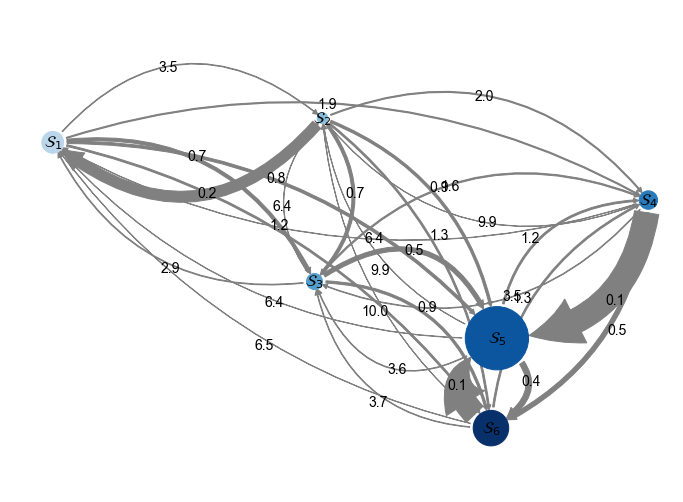

In [19]:
fig, ax = plt.subplots(figsize=(12, 12))

pyemma.plots.plot_network(
    inverse_mfpt,
    pos=coarse_state_centers,
    figpadding=0,
    arrow_label_format='%.1f',
    arrow_labels=mfpt/1000,
    size=16,
    state_colors=[hexlist[3],hexlist[2],hexlist[4],hexlist[5],hexlist[7],hexlist[6]],
    state_labels=[r'$\mathcal{S}_2$',r'$\mathcal{S}_1$',r'$\mathcal{S}_3$',
                  r'$\mathcal{S}_4$',r'$\mathcal{S}_6$',r'$\mathcal{S}_5$'],
    state_sizes=np.array(stat_dist),
    arrow_scale=6.0, arrow_curvature=3,
    show_frame=False,
    arrow_label_size=14,
    fontweight='bold',
    ax=ax)

# ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
# ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')
ax.set(xlim=(1.5,3.5) , ylim=(2.0,3.25))
# ax.set_xticks(np.arange(2, 4.5, 0.5))
# ax.set_yticks(np.arange(1.5, 4, 0.5))
ax.set_aspect('equal')

fig.savefig('./plots/2-Without_IPA/14_MFPT.png', dpi=600)